# GA for LP model

# Introduction-Step by Step

## 1. 得到初始DNA: 100X10 Array, 內容為隨機 0 or 1
Get the initial population: 100X10 Array, the content is random 0 or 1

In [166]:
pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE))

In [167]:
pop.shape

(100, 10)

## 2. 將DNA 100X10(0 or 1) 轉成 100X1(0~5)

In [168]:
def translateDNA(pop): 
    return pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2**DNA_SIZE-1) * X_BOUND[1] 
# 2.1 pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2**DNA_SIZE-1): 轉換成0~1概率值, 加總=1
# 2.2 *X_BOUND[1]: 概率乘以5, 轉換成0~5期望值, 以符合題目條件: x介於[0,5]之間

## 3. 將DNA 100X10(0 ~ 5) 轉成100X1(-9 ~ 6), 以得到Y=F(X)

標示式:

In [169]:
def F(x): 
    return np.sin(10*x)*x + np.cos(2*x)*x

In [170]:
F_values = F(translateDNA(pop))

In [171]:
F_values.min(),F_values.max()

(-9.480744870638143, 6.421816483484863)

## 4. 將Array 100X1(-9 ~ 6) 轉乘 100X1(0 ~ 15)的fitness值 (F=F+0.001-min(F))
根據目標式, F(X)介於-9 ~ 6之間, 轉換成fitness之後, 介於0 ~ 15之間 (>0),為了之後的selection功能

In [172]:
def get_fitness(pred): 
    return pred + 1e-3 - np.min(pred)

In [173]:
fitness = get_fitness(F_values)

In [174]:
fitness.min(),fitness.max()

(0.0009999999999994458, 15.903561354123006)

In [102]:
df = pd.DataFrame(fitness)
#df.describe()

## 5. 將Array 100X1(0 ~ 15)的fitness值內容 轉換成 100X1(0 ~ 99), 再轉成概率值p, 之後再根據p隨機抽取0~99, 返回成100X10新的一組DNA(內容為0 or 1)
### 5.1 將Array 100X1(0~15)的fitness值內容, 轉換成概率p
### 5.2 並且根據100個概率值p, 從0~99中(np.arange(POP_SIZE)), 隨機抽取100個(POP_SIZE=100), 取後放回(replace=True)

In [175]:
def select(pop, fitness):
    idx = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE, replace=True,
                           p=fitness/fitness.sum())
    return pop[idx]

In [107]:
idx = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE, replace=True, p=fitness/fitness.sum())
#idx

In [106]:
pop = select(pop, fitness)
#pop

# 6. 隨機從100個DNA中的1個(idx), 再從原本DNA的10個基因中隨機取n個, 與第idx個進行交換

In [ ]:
CROSS_RATE = 0.8
def crossover(parent, pop):
    if np.random.rand() < CROSS_RATE:
        i_ = np.random.randint(0, POP_SIZE, size=1)
        cross_points = np.random.randint(0, 2, size=DNA_SIZE).astype(np.bool)
        parent[cross_points] = pop[i_, cross_points]
    return parent

In [108]:
CROSS_RATE = 0.8         # mating probability (DNA crossover)
def crossover(parent, pop):     # mating process (genes crossover)
    if np.random.rand() < CROSS_RATE:
        i_ = np.random.randint(0, POP_SIZE, size=1)  #隨機從100個DNA中的1個    # select another individual from pop
        cross_points = np.random.randint(0, 2, size=DNA_SIZE).astype(np.bool)   # 隨機從10個基因中取n個. 作法:隨機建立 0 or 1的正整數Array, 再轉成True of False # choose crossover points
        parent[cross_points] = pop[i_, cross_points] #從原本DNA的10個基因中隨機取n個, 與第idx個進行交換  # mating and produce one child
    return parent

# 7. 隨機取子代(機率: 0.003), 若取中則將0與1進行交換(突變)

In [ ]:
MUTATION_RATE = 0.003
def mutate(child):
    for point in range(DNA_SIZE):
        if np.random.rand() < MUTATION_RATE:
            child[point] = 1 if child[point] == 0 else 0
    return child

In [130]:
DNA_SIZE = 10            # DNA length
POP_SIZE = 100           # population size
CROSS_RATE = 0.8         # mating probability (DNA crossover)
MUTATION_RATE = 0.003    # mutation probability
N_GENERATIONS = 200
X_BOUND = [0, 5]         # x upper and lower bounds


def F(x): return np.sin(10*x)*x + np.cos(2*x)*x     # 目標: 求解100組數據X, 尋找最大值F(X)


# find non-zero fitness for selection
def get_fitness(pred): return pred + 1e-3 - np.min(pred)


# convert binary DNA to decimal and normalize it to a range(0, 5)
def translateDNA(pop): return pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2**DNA_SIZE-1) * X_BOUND[1]


def select(pop, fitness):    # nature selection wrt pop's fitness
    idx = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE, replace=True,
                           p=fitness/fitness.sum())
    return pop[idx]


def crossover(parent, pop):     # mating process (genes crossover)
    if np.random.rand() < CROSS_RATE:
        i_ = np.random.randint(0, POP_SIZE, size=1)                             # select another individual from pop
        cross_points = np.random.randint(0, 2, size=DNA_SIZE).astype(np.bool)   # choose crossover points
        parent[cross_points] = pop[i_, cross_points]                            # mating and produce one child
    return parent


def mutate(child):
    for point in range(DNA_SIZE):
        if np.random.rand() < MUTATION_RATE:
            child[point] = 1 if child[point] == 0 else 0
    return child

In [176]:
def GA(N_GENERATIONS,pop):
    performance=[]
    for _ in range(N_GENERATIONS):
        F_values = translateDNA(pop)
        F_values = F(F_values)
        print("Generation: ", _)
        print("Max F_values: ", F_values.sum())
        performance.append(F_values.sum())

        #if 'sca' in globals(): sca.remove()
        sca = plt.scatter(translateDNA(pop), F_values, s=200, lw=0, c='red', alpha=0.5); plt.pause(0.05)

        # GA part (evolution)
        fitness = get_fitness(F_values)
        pop = select(pop, fitness)
        pop_copy = pop.copy()
        for parent in pop:
            child = crossover(parent, pop_copy)
            child = mutate(child)
            parent[:] = child
    #return(performance)

Generation:  0
Max F_values:  -52.93535435940143


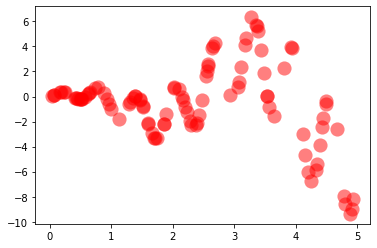

Generation:  1
Max F_values:  44.962450851038504


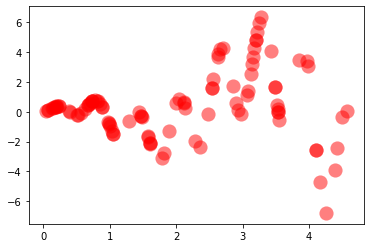

Generation:  2
Max F_values:  91.49669431486114


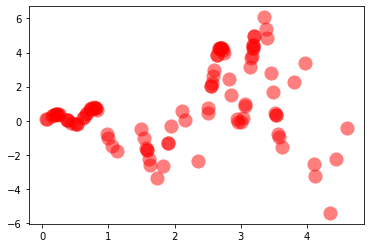

Generation:  3
Max F_values:  132.95095884759976


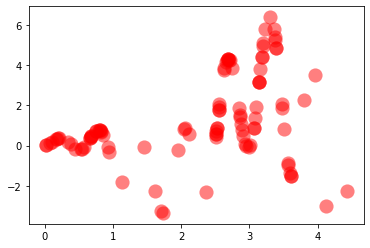

Generation:  4
Max F_values:  179.05107813327524


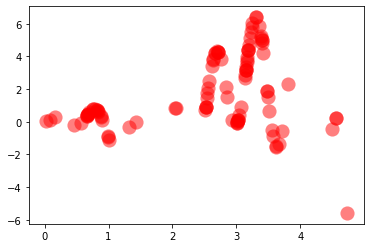

Generation:  5
Max F_values:  231.11602092584343


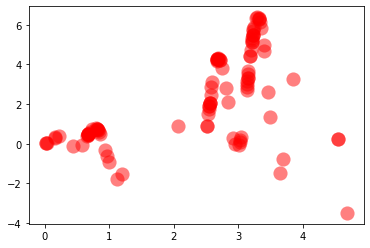

Generation:  6
Max F_values:  288.199377301639


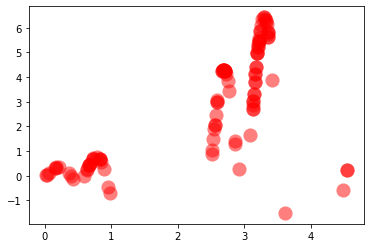

Generation:  7
Max F_values:  408.95271555787684


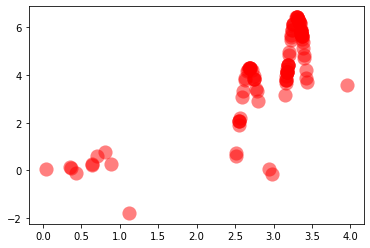

Generation:  8
Max F_values:  460.34424137910946


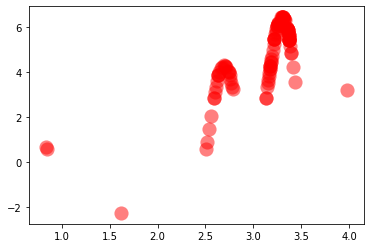

Generation:  9
Max F_values:  478.68016877484087


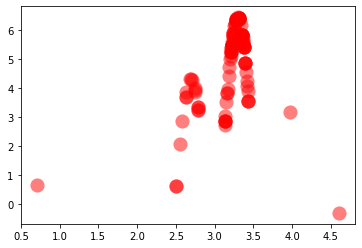

Generation:  10
Max F_values:  507.1732923886124


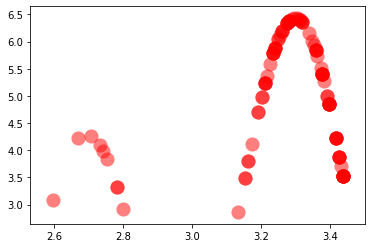

Generation:  11
Max F_values:  536.2718686526212


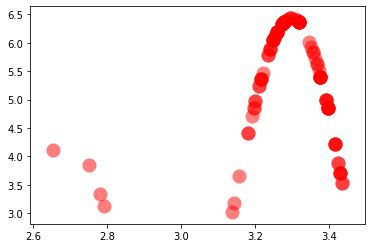

Generation:  12
Max F_values:  549.5238692406855


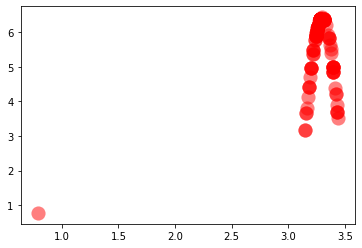

Generation:  13
Max F_values:  557.9969743770334


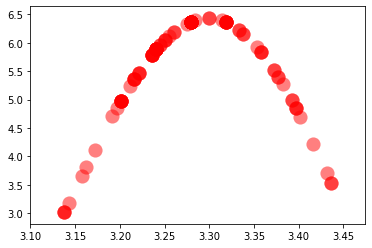

Generation:  14
Max F_values:  544.4217781505716


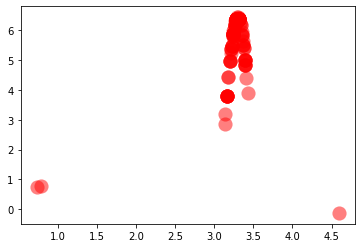

Generation:  15
Max F_values:  551.7354308384307


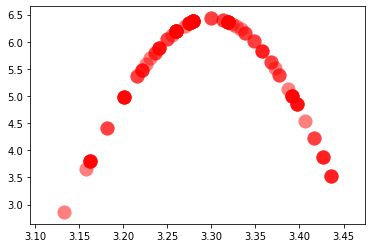

Generation:  16
Max F_values:  572.6734733027253


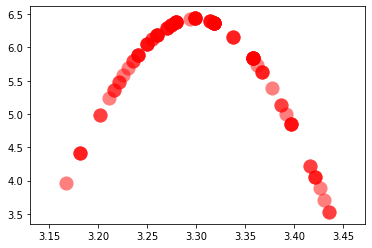

Generation:  17
Max F_values:  576.692156743552


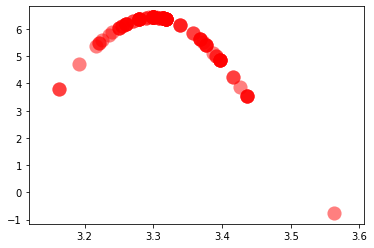

Generation:  18
Max F_values:  579.5634265010879


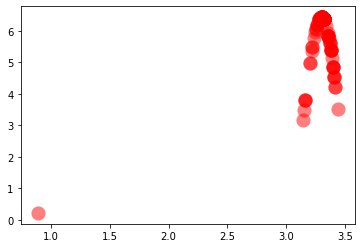

Generation:  19
Max F_values:  555.2387877652353


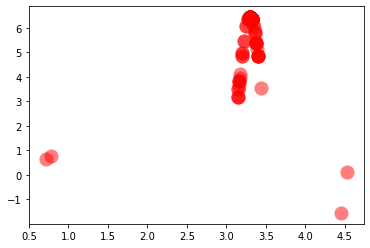

Generation:  20
Max F_values:  564.5752425920584


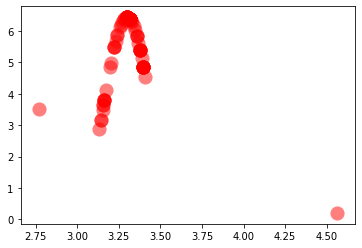

Generation:  21
Max F_values:  569.2830200854723


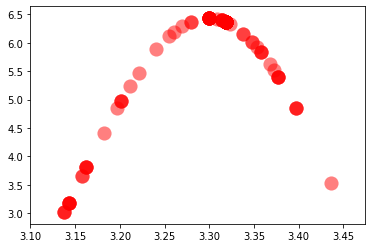

Generation:  22
Max F_values:  596.923096568059


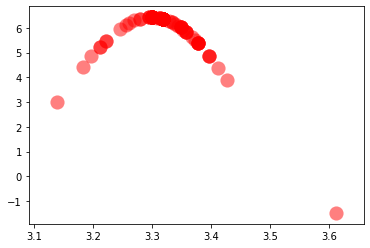

Generation:  23
Max F_values:  601.0594445472739


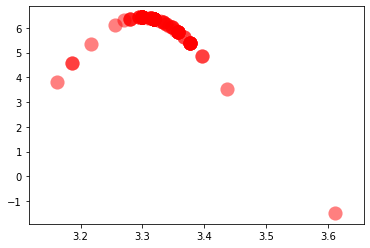

Generation:  24
Max F_values:  594.2935529301772


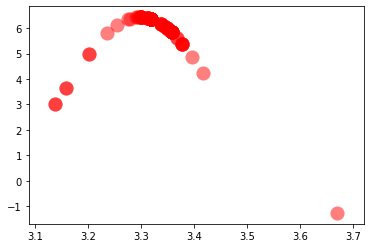

Generation:  25
Max F_values:  602.5189055951802


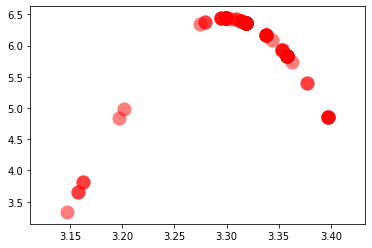

Generation:  26
Max F_values:  605.5423944373066


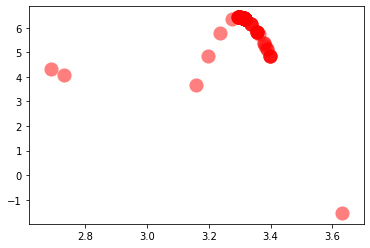

Generation:  27
Max F_values:  601.2297302766561


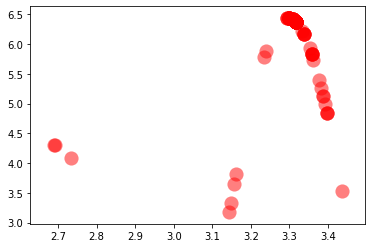

Generation:  28
Max F_values:  599.6562439529561


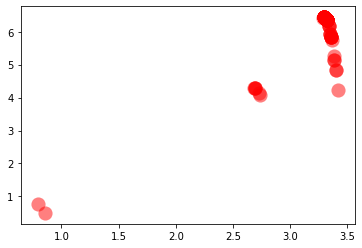

Generation:  29
Max F_values:  602.0021082937625


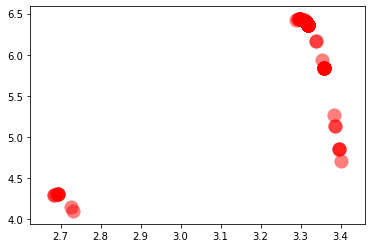

Generation:  30
Max F_values:  604.8698740483325


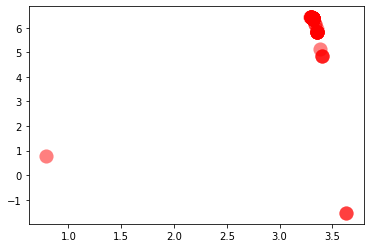

Generation:  31
Max F_values:  615.7142780895558


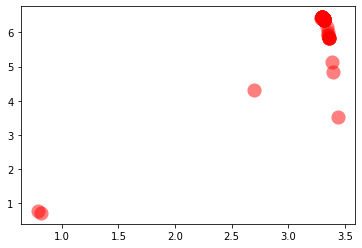

Generation:  32
Max F_values:  625.159116256539


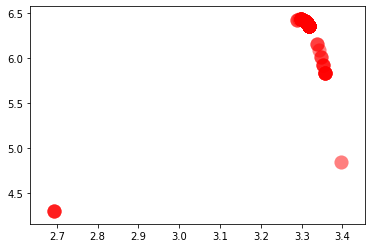

Generation:  33
Max F_values:  614.2544256319471


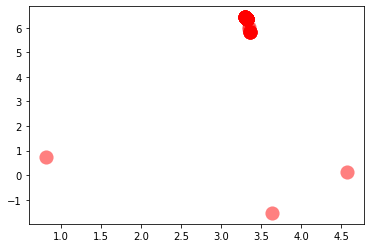

Generation:  34
Max F_values:  632.372267146138


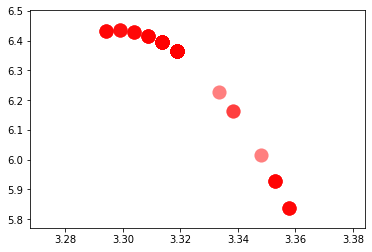

Generation:  35
Max F_values:  631.3598657824527


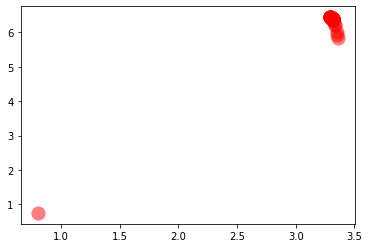

Generation:  36
Max F_values:  634.166028297512


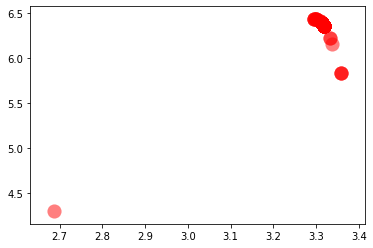

Generation:  37
Max F_values:  635.3650850375907


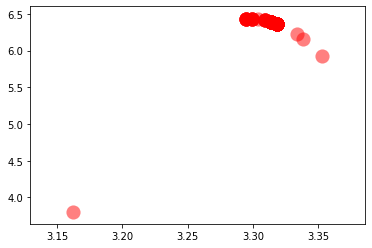

Generation:  38
Max F_values:  621.5057524399299


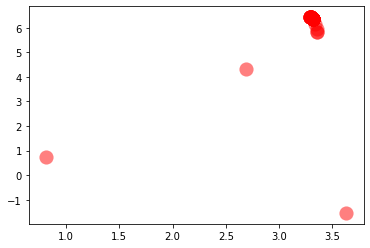

Generation:  39
Max F_values:  630.028629629287


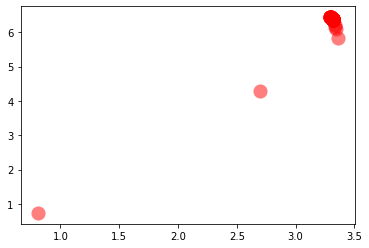

Generation:  40
Max F_values:  632.1460217224588


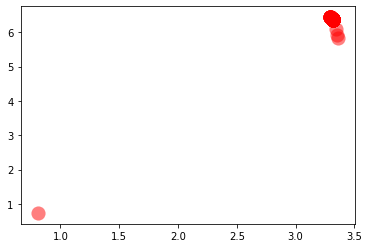

Generation:  41
Max F_values:  617.0145109954668


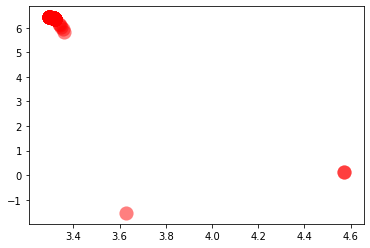

Generation:  42
Max F_values:  632.9688083323849


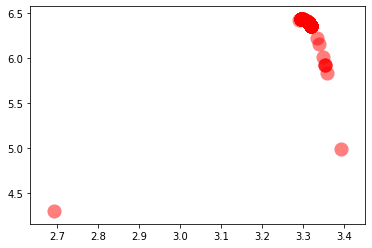

Generation:  43
Max F_values:  629.6840214737947


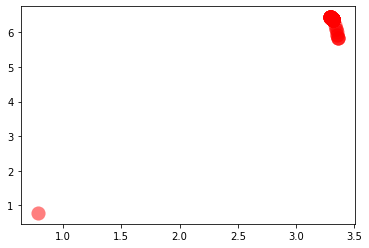

Generation:  44
Max F_values:  634.3236084267924


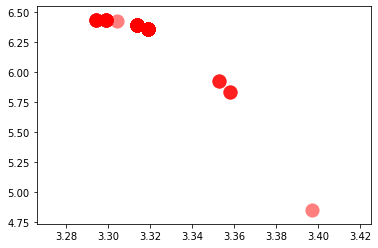

Generation:  45
Max F_values:  631.1557328142123


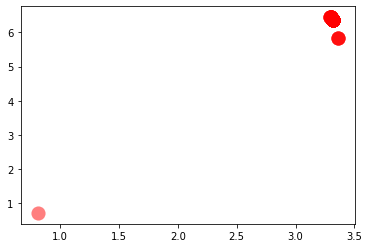

Generation:  46
Max F_values:  633.9689232208069


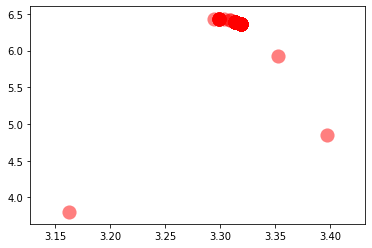

Generation:  47
Max F_values:  621.7720027524081


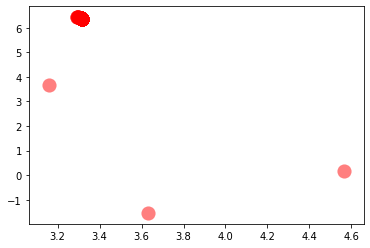

Generation:  48
Max F_values:  638.2327085903338


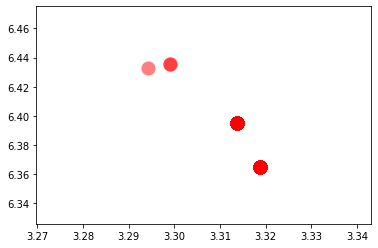

Generation:  49
Max F_values:  636.8499638035497


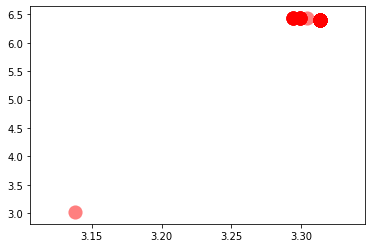

Generation:  50
Max F_values:  632.1758212018572


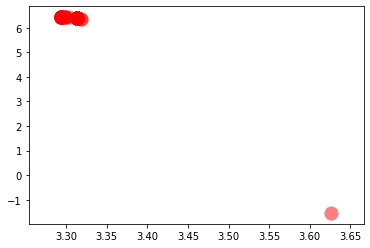

Generation:  51
Max F_values:  616.456776141772


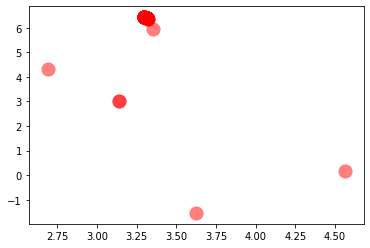

Generation:  52
Max F_values:  626.9820526434485


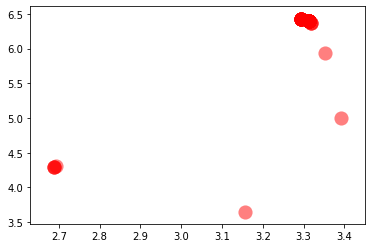

Generation:  53
Max F_values:  619.5932633370447


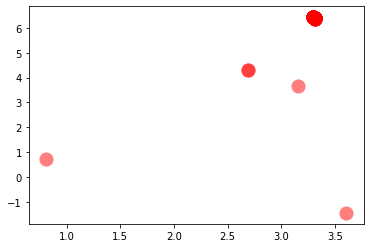

Generation:  54
Max F_values:  634.0614700862423


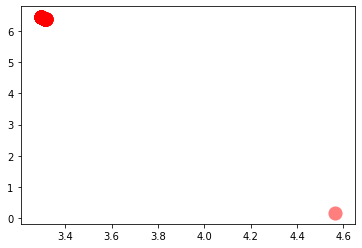

Generation:  55
Max F_values:  638.5003739444089


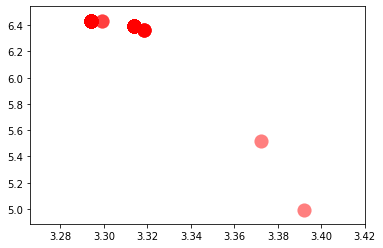

Generation:  56
Max F_values:  639.8578308784574


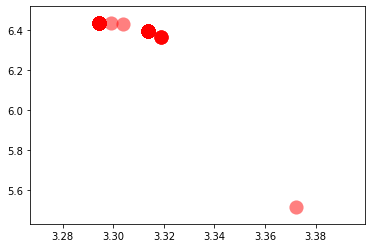

Generation:  57
Max F_values:  635.4007237815522


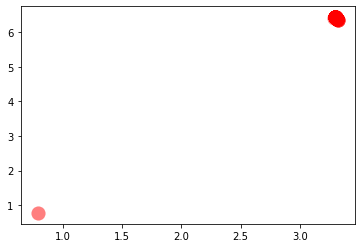

Generation:  58
Max F_values:  632.5723858678022


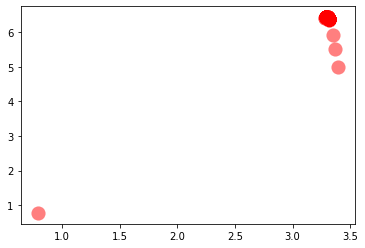

Generation:  59
Max F_values:  633.2139503174536


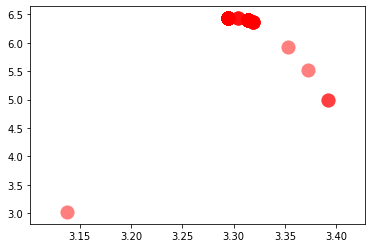

Generation:  60
Max F_values:  619.4778960193586


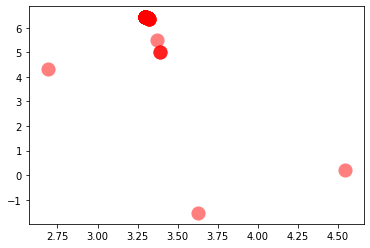

Generation:  61
Max F_values:  636.1150708069354


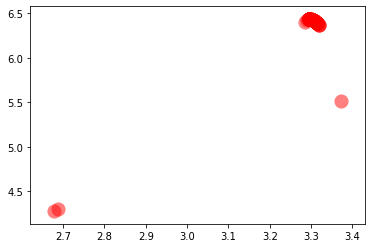

Generation:  62
Max F_values:  640.3721186761863


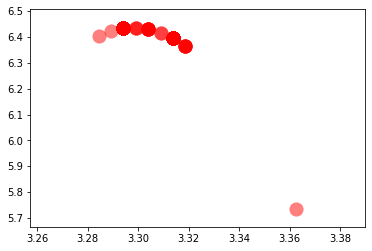

Generation:  63
Max F_values:  638.3087522973384


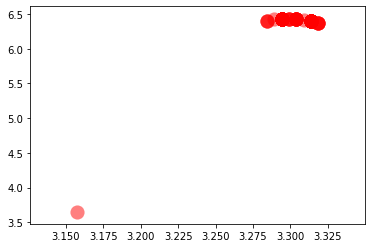

Generation:  64
Max F_values:  634.0878531352151


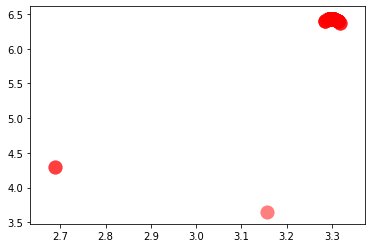

Generation:  65
Max F_values:  620.8091231017507


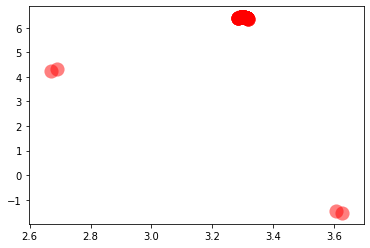

Generation:  66
Max F_values:  634.5661892045425


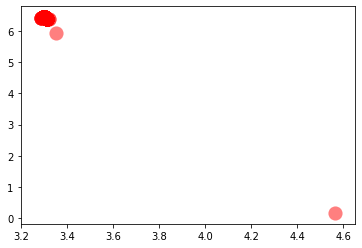

Generation:  67
Max F_values:  641.200321764609


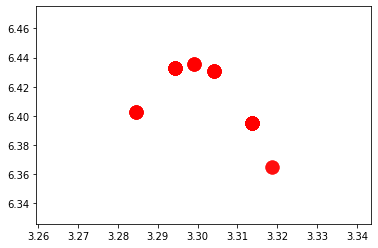

Generation:  68
Max F_values:  626.613981382743


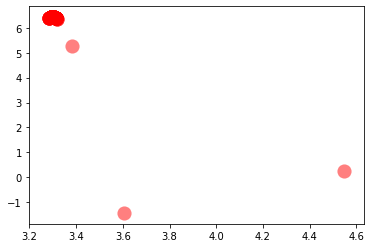

Generation:  69
Max F_values:  622.9176923769504


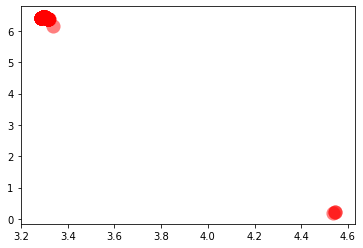

Generation:  70
Max F_values:  630.144322591504


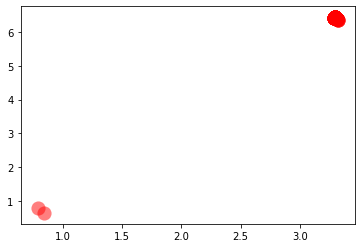

Generation:  71
Max F_values:  635.8350616888376


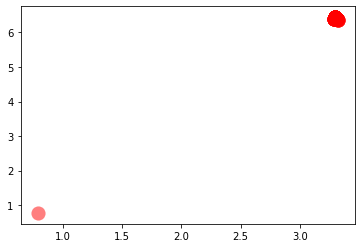

Generation:  72
Max F_values:  637.5093996979182


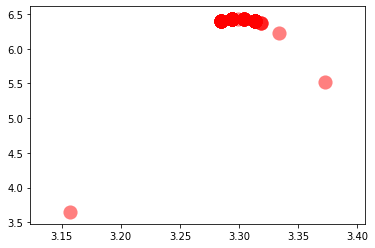

Generation:  73
Max F_values:  633.5485651683215


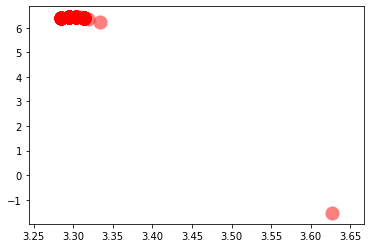

Generation:  74
Max F_values:  630.7500281949729


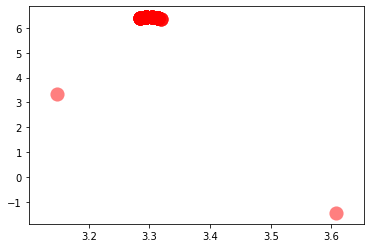

Generation:  75
Max F_values:  640.2778658205928


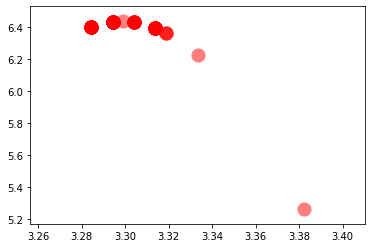

Generation:  76
Max F_values:  641.5249748938229


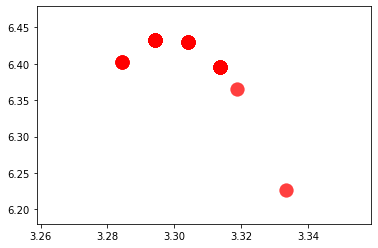

Generation:  77
Max F_values:  633.794364298846


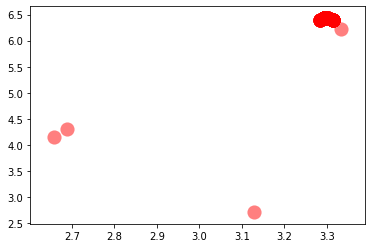

Generation:  78
Max F_values:  625.9001610316049


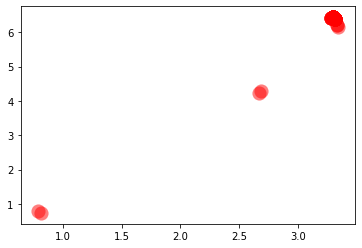

Generation:  79
Max F_values:  630.4276668632704


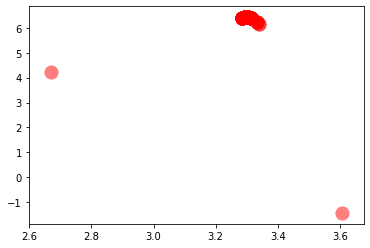

Generation:  80
Max F_values:  640.8970226189261


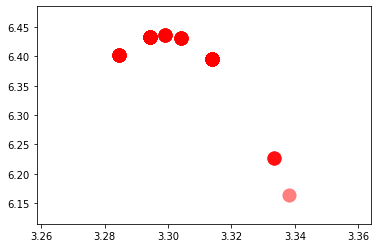

Generation:  81
Max F_values:  633.9301957015028


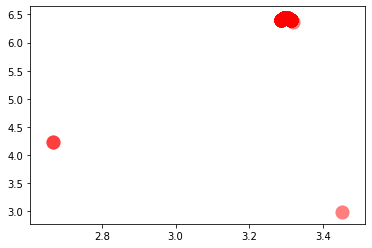

Generation:  82
Max F_values:  637.9221866537505


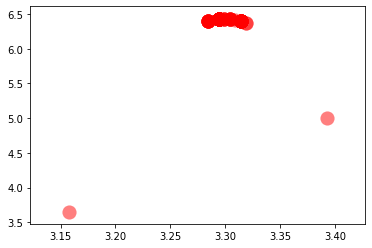

Generation:  83
Max F_values:  631.757722596481


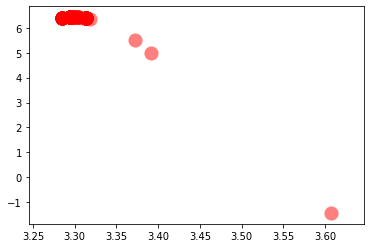

Generation:  84
Max F_values:  640.8814347210695


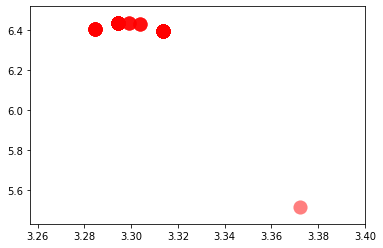

Generation:  85
Max F_values:  640.025223401546


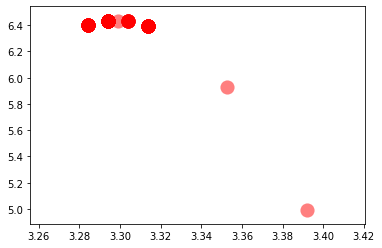

Generation:  86
Max F_values:  636.1486208669072


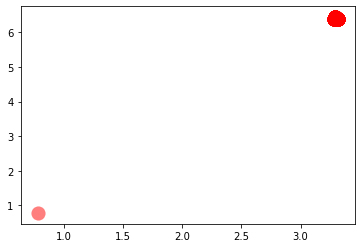

Generation:  87
Max F_values:  612.4229651431306


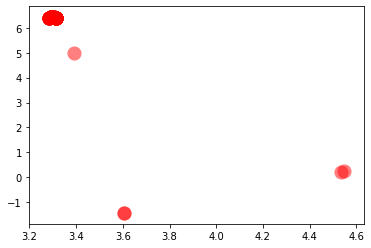

Generation:  88
Max F_values:  641.4958867289135


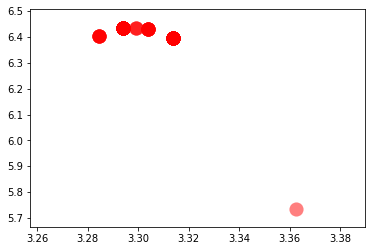

Generation:  89
Max F_values:  631.3417901437841


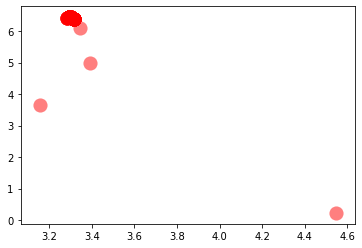

Generation:  90
Max F_values:  626.3748047155326


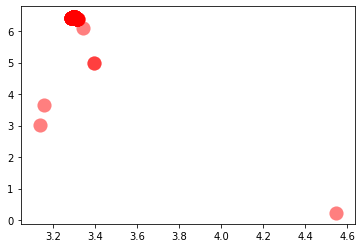

Generation:  91
Max F_values:  627.5123983427578


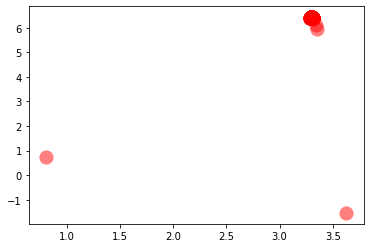

Generation:  92
Max F_values:  620.9263061806829


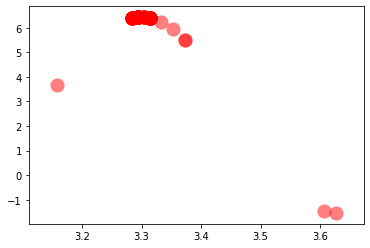

Generation:  93
Max F_values:  627.4480042076094


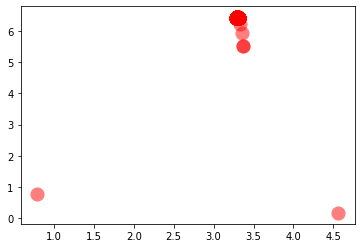

Generation:  94
Max F_values:  635.2416480801323


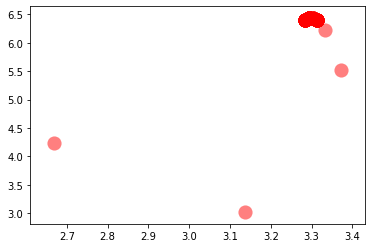

Generation:  95
Max F_values:  634.1905565313874


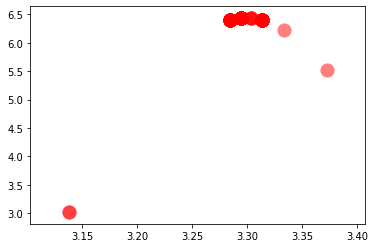

Generation:  96
Max F_values:  640.7529255184706


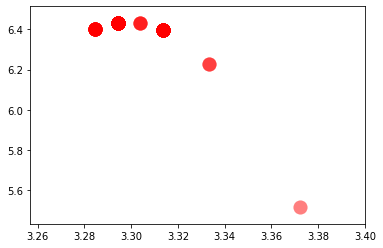

Generation:  97
Max F_values:  629.9840548537309


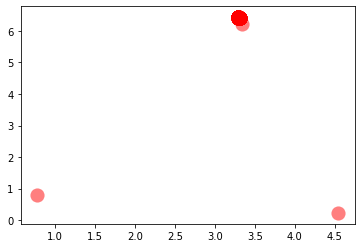

Generation:  98
Max F_values:  636.3608074090677


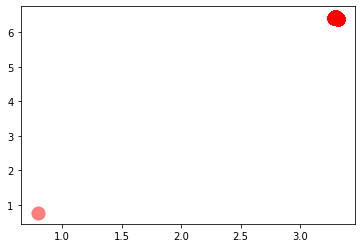

Generation:  99
Max F_values:  641.1011746671676


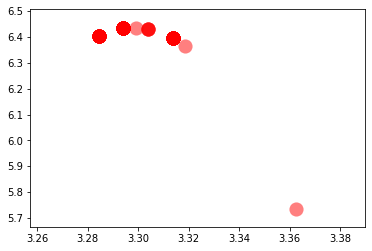

Generation:  100
Max F_values:  642.0689464656473


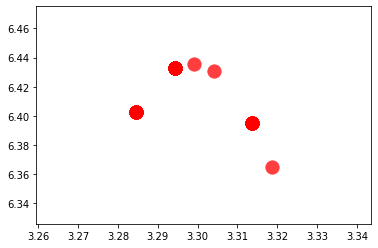

Generation:  101
Max F_values:  632.8871430919285


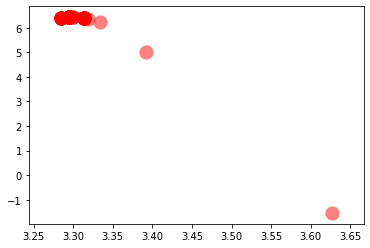

Generation:  102
Max F_values:  634.8393384996112


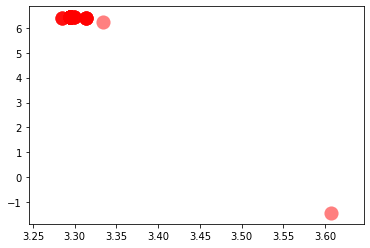

Generation:  103
Max F_values:  631.359443939702


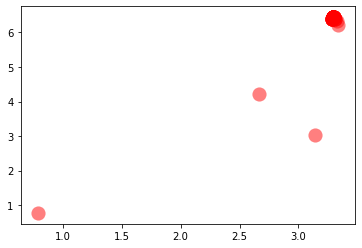

Generation:  104
Max F_values:  619.4539459347228


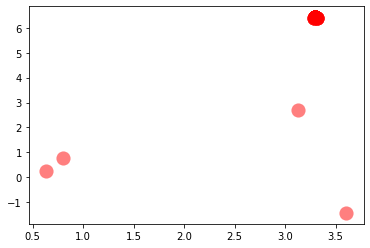

Generation:  105
Max F_values:  615.6863187952081


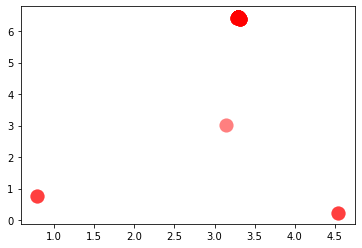

Generation:  106
Max F_values:  642.4061469559133


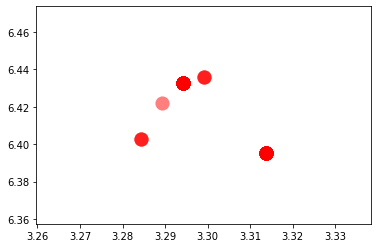

Generation:  107
Max F_values:  635.1864014198334


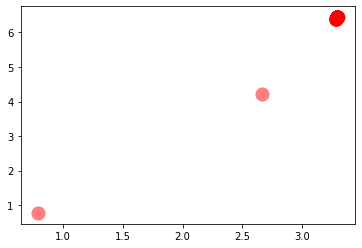

Generation:  108
Max F_values:  635.1295901863076


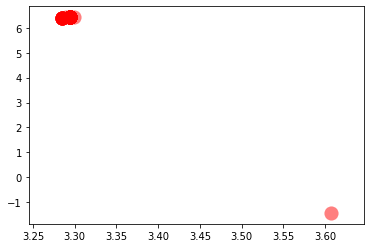

Generation:  109
Max F_values:  636.6624513741482


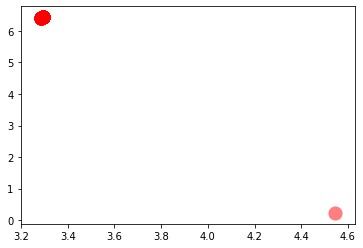

Generation:  110
Max F_values:  623.5663454651159


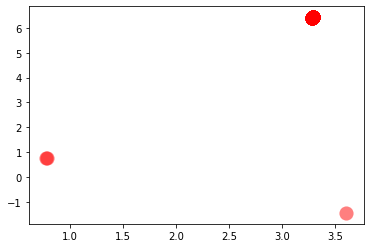

Generation:  111
Max F_values:  623.7951096646849


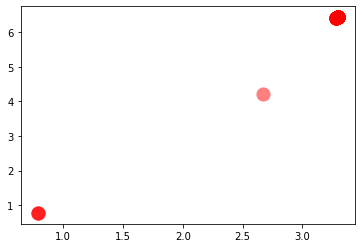

Generation:  112
Max F_values:  631.1562079522502


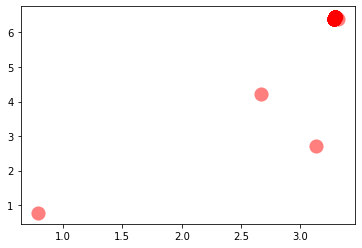

Generation:  113
Max F_values:  623.5402423400783


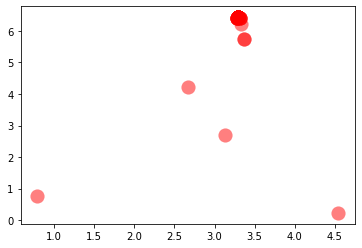

Generation:  114
Max F_values:  622.3510159851846


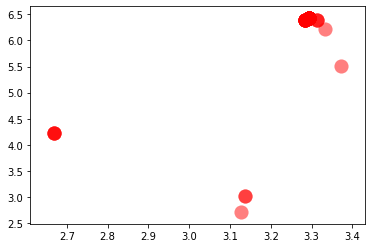

Generation:  115
Max F_values:  620.1743913477019


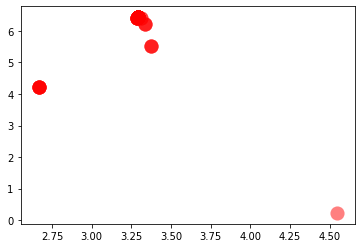

Generation:  116
Max F_values:  626.6757141550237


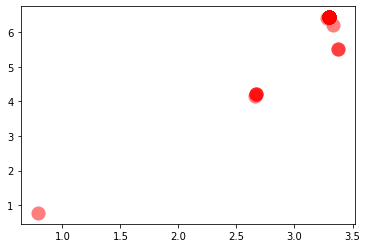

Generation:  117
Max F_values:  642.3423515188447


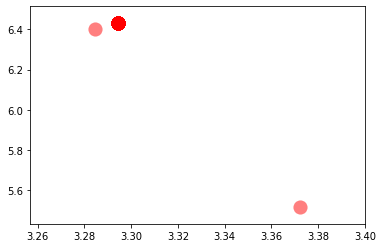

Generation:  118
Max F_values:  640.8196004138588


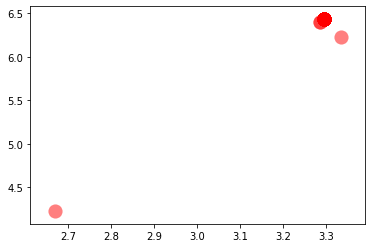

Generation:  119
Max F_values:  634.0728804023895


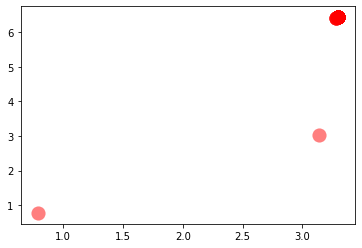

Generation:  120
Max F_values:  634.5423092309951


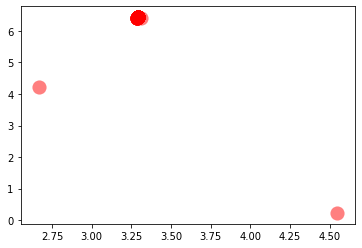

Generation:  121
Max F_values:  637.2720381685657


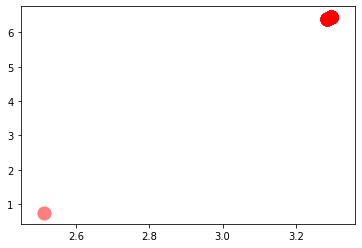

Generation:  122
Max F_values:  634.1843313989511


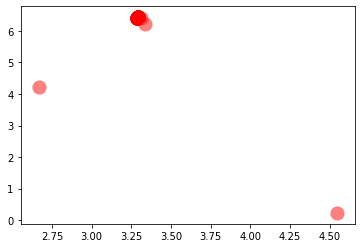

Generation:  123
Max F_values:  635.326212620966


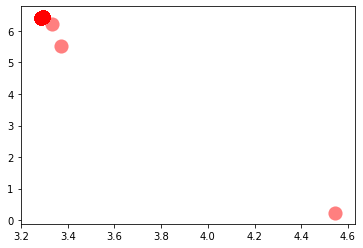

Generation:  124
Max F_values:  629.9219444395571


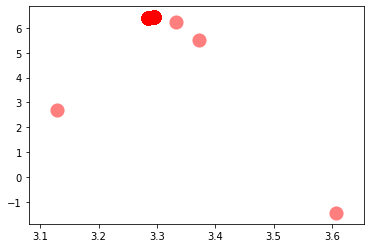

Generation:  125
Max F_values:  635.2574265665389


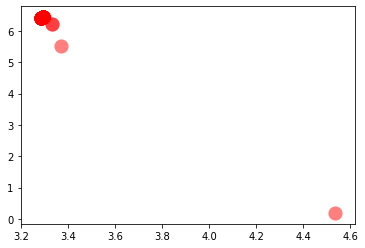

Generation:  126
Max F_values:  636.0520172263165


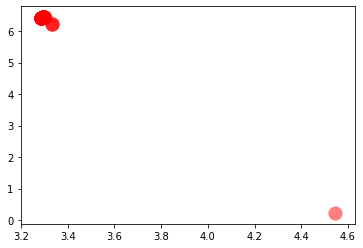

Generation:  127
Max F_values:  641.8828047670354


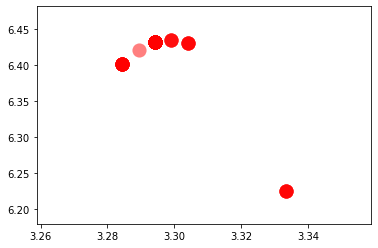

Generation:  128
Max F_values:  636.8613675326694


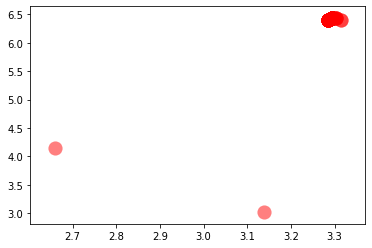

Generation:  129
Max F_values:  630.7181410017319


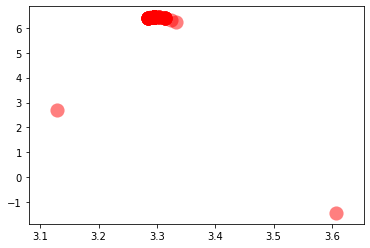

Generation:  130
Max F_values:  627.6168837678493


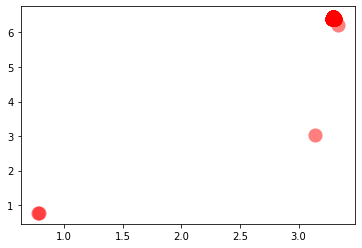

Generation:  131
Max F_values:  629.8930602135263


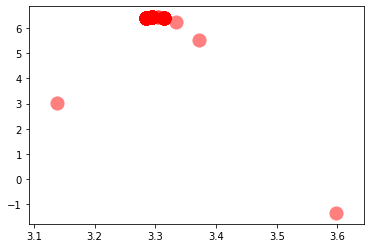

Generation:  132
Max F_values:  629.5293954940907


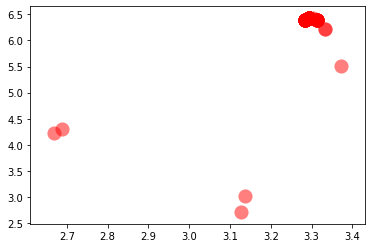

Generation:  133
Max F_values:  629.8918731933339


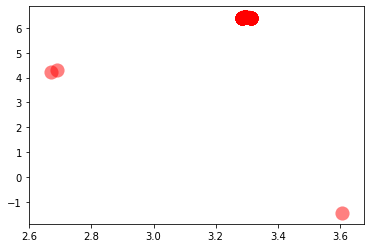

Generation:  134
Max F_values:  623.5137408165149


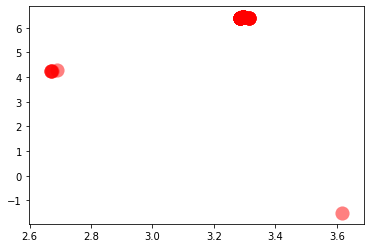

Generation:  135
Max F_values:  628.375038273937


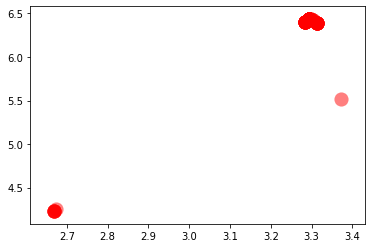

Generation:  136
Max F_values:  634.7392287284649


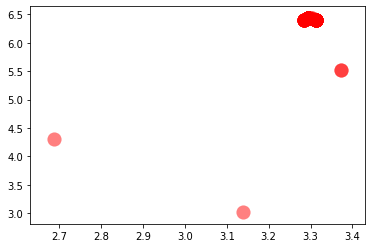

Generation:  137
Max F_values:  636.197795878338


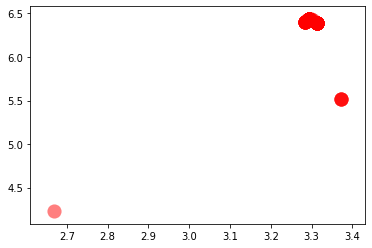

Generation:  138
Max F_values:  629.8138848088147


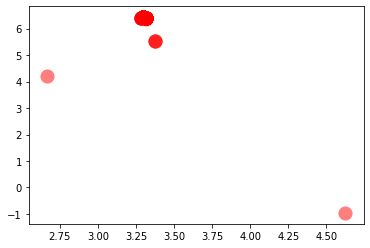

Generation:  139
Max F_values:  630.7620680219495


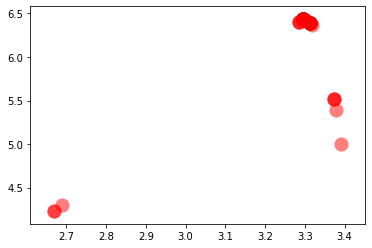

Generation:  140
Max F_values:  638.2135137754756


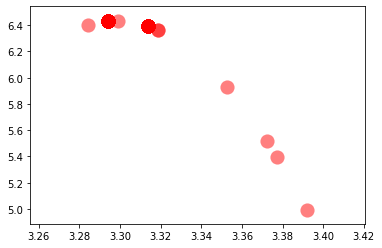

Generation:  141
Max F_values:  633.6921476455266


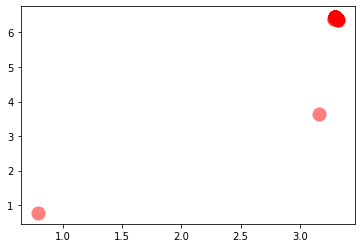

Generation:  142
Max F_values:  634.7747802906937


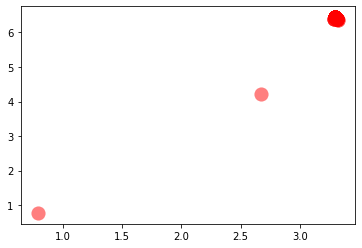

Generation:  143
Max F_values:  631.916774037644


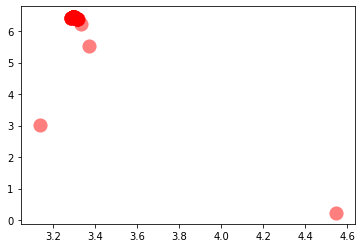

Generation:  144
Max F_values:  632.9459114154747


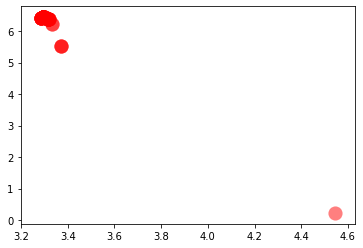

Generation:  145
Max F_values:  629.1270955296826


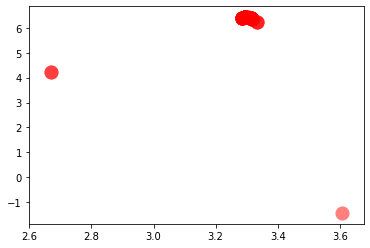

Generation:  146
Max F_values:  622.9093610207467


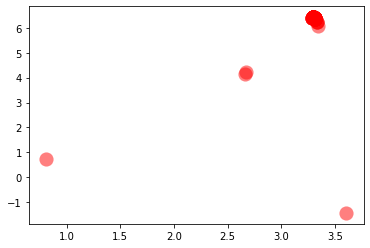

Generation:  147
Max F_values:  635.5125094570973


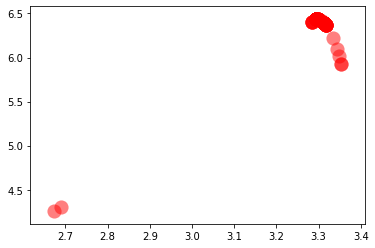

Generation:  148
Max F_values:  635.6071778572779


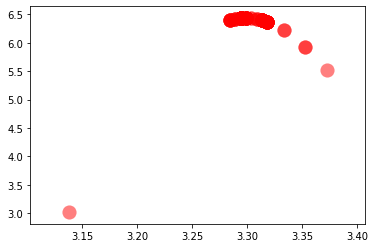

Generation:  149
Max F_values:  631.9936517878947


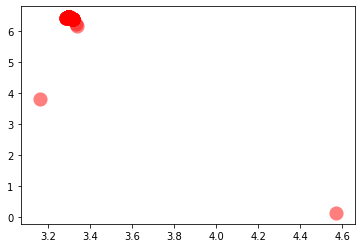

Generation:  150
Max F_values:  630.6167547793758


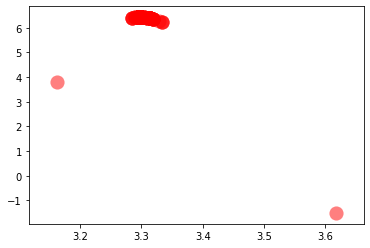

Generation:  151
Max F_values:  641.216142599352


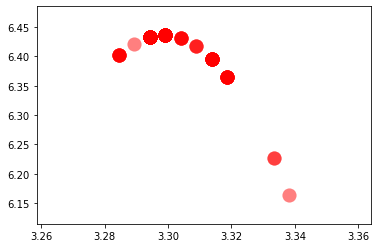

Generation:  152
Max F_values:  624.4326735850243


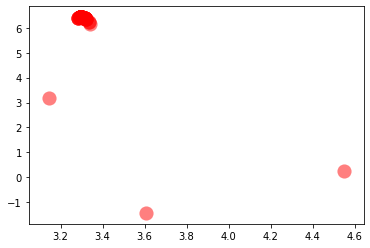

Generation:  153
Max F_values:  638.1665953470745


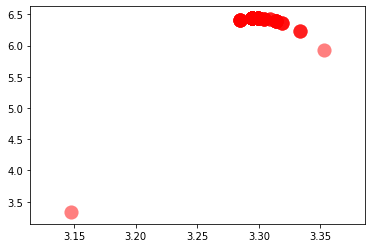

Generation:  154
Max F_values:  623.4761457868124


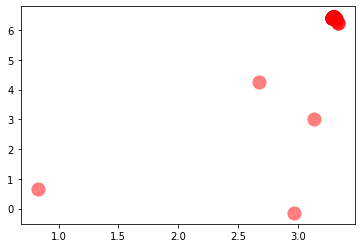

Generation:  155
Max F_values:  627.5379549902789


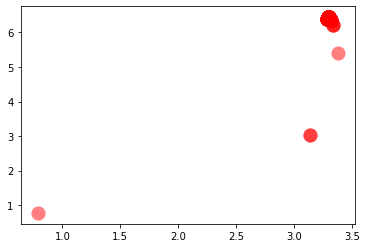

Generation:  156
Max F_values:  631.4242386492127


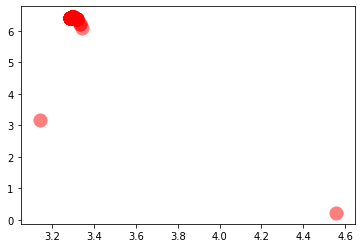

Generation:  157
Max F_values:  636.5963128239343


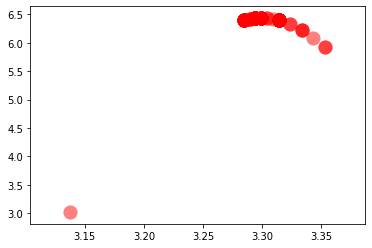

Generation:  158
Max F_values:  640.6815877374653


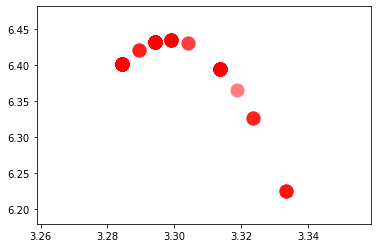

Generation:  159
Max F_values:  634.3739729229816


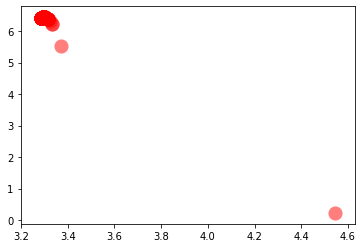

Generation:  160
Max F_values:  638.3294063232839


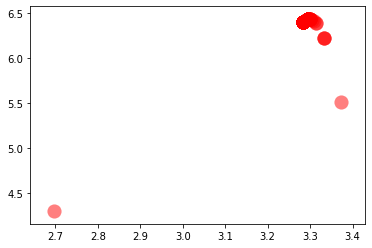

Generation:  161
Max F_values:  633.4554211702158


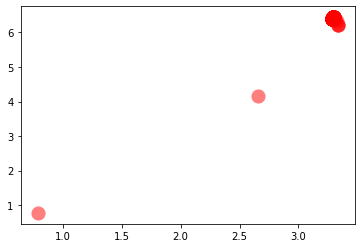

Generation:  162
Max F_values:  626.3354197664269


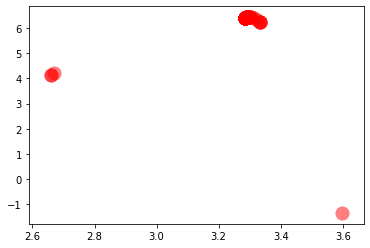

Generation:  163
Max F_values:  616.0823679048084


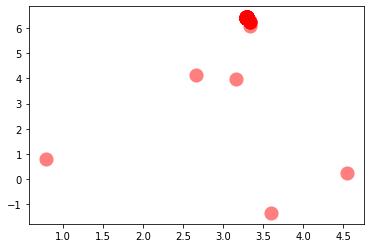

Generation:  164
Max F_values:  612.2091401044325


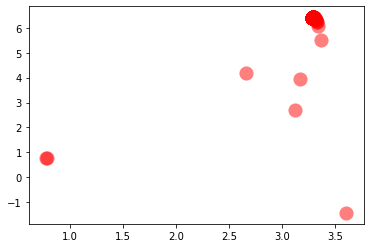

Generation:  165
Max F_values:  633.6030417386002


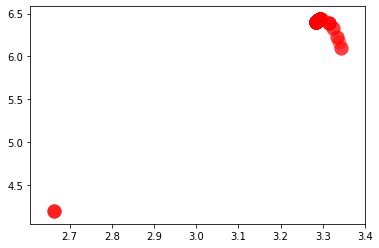

Generation:  166
Max F_values:  640.4072557173082


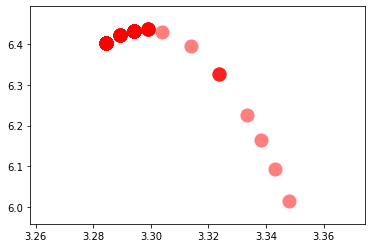

Generation:  167
Max F_values:  629.9869937805995


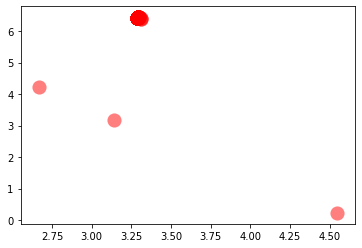

Generation:  168
Max F_values:  620.589001728461


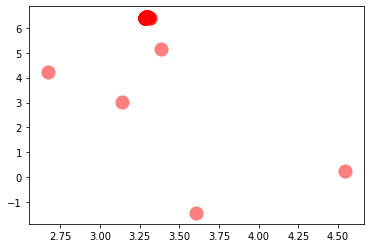

Generation:  169
Max F_values:  622.254877437182


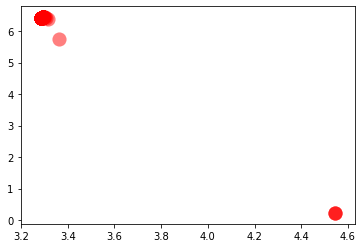

Generation:  170
Max F_values:  636.7356308163761


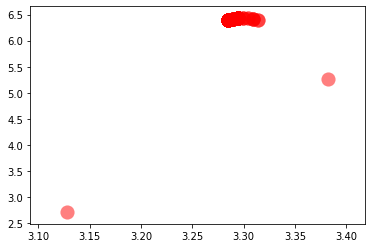

Generation:  171
Max F_values:  633.7967888502798


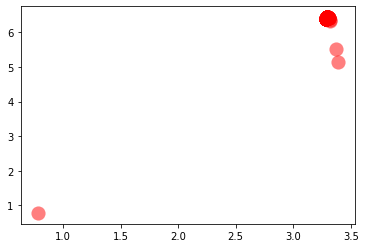

Generation:  172
Max F_values:  607.976189017881


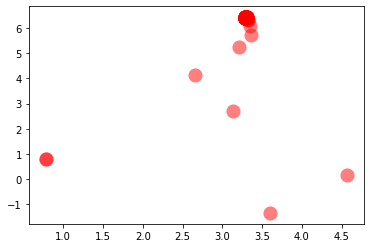

Generation:  173
Max F_values:  636.4209811186829


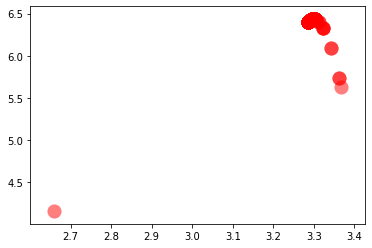

Generation:  174
Max F_values:  637.2500008640241


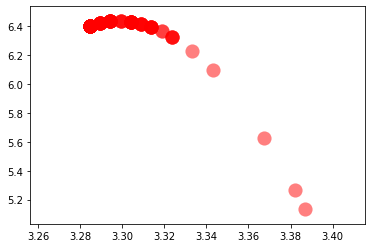

Generation:  175
Max F_values:  640.3817474058588


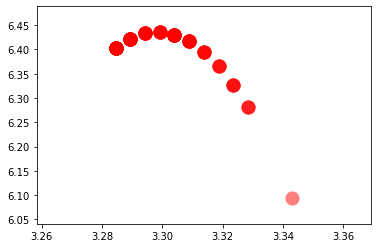

Generation:  176
Max F_values:  628.4641556982838


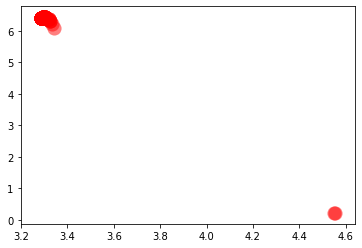

Generation:  177
Max F_values:  638.8430794616543


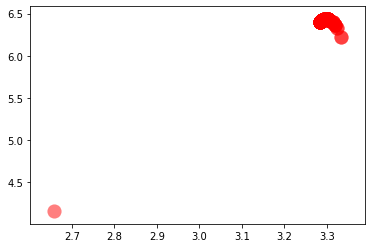

Generation:  178
Max F_values:  627.1300598193183


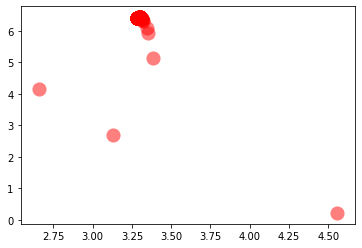

Generation:  179
Max F_values:  628.1922847141366


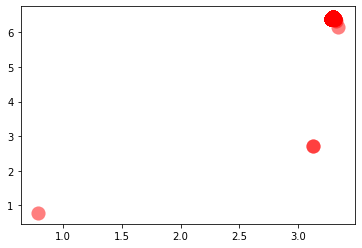

Generation:  180
Max F_values:  634.3698407989014


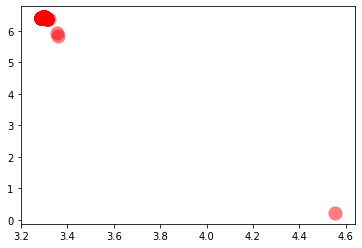

Generation:  181
Max F_values:  623.9567919499096


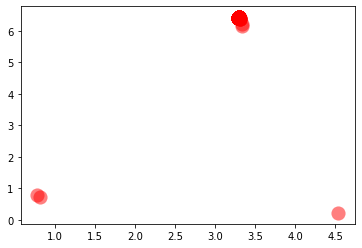

Generation:  182
Max F_values:  641.3584296848687


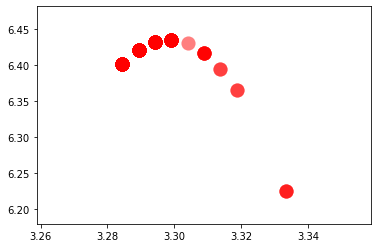

Generation:  183
Max F_values:  638.5841163060675


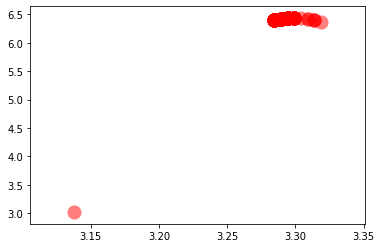

Generation:  184
Max F_values:  641.7053141645914


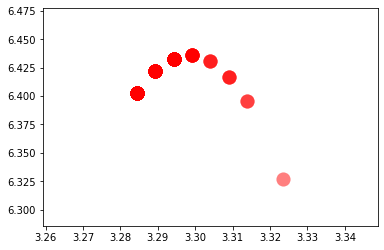

Generation:  185
Max F_values:  630.7818928223328


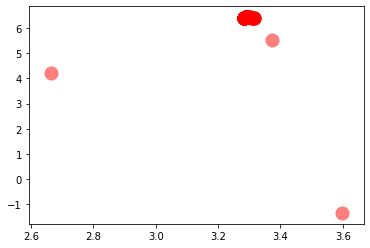

Generation:  186
Max F_values:  633.7650500406339


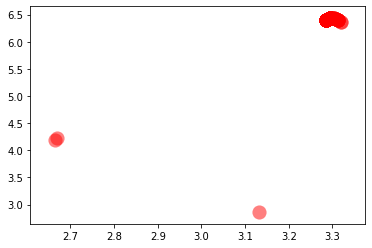

Generation:  187
Max F_values:  639.4351335318087


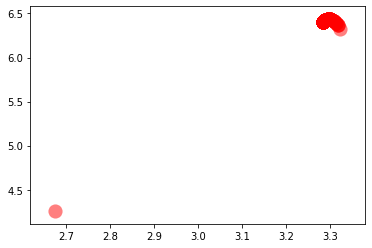

Generation:  188
Max F_values:  629.9230716911931


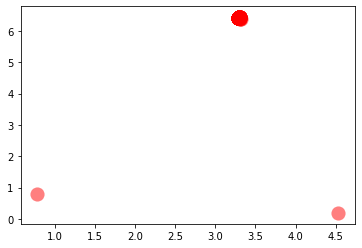

Generation:  189
Max F_values:  632.819749687529


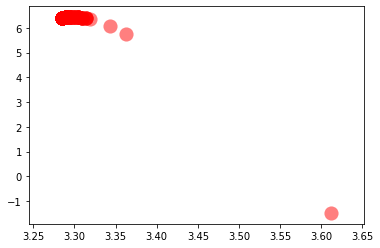

Generation:  190
Max F_values:  626.3687614825515


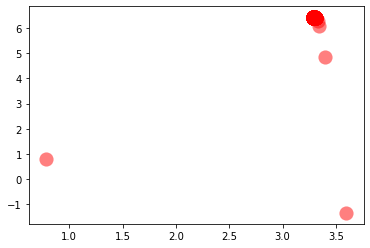

Generation:  191
Max F_values:  622.3880182325132


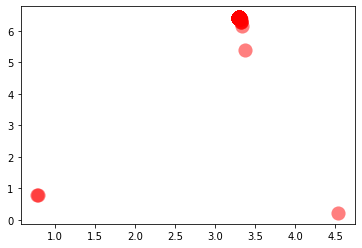

Generation:  192
Max F_values:  637.6907347986622


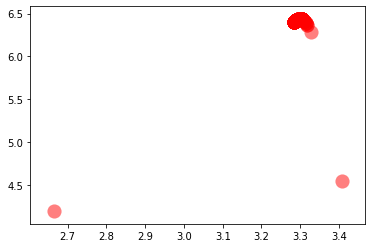

Generation:  193
Max F_values:  622.0210831671063


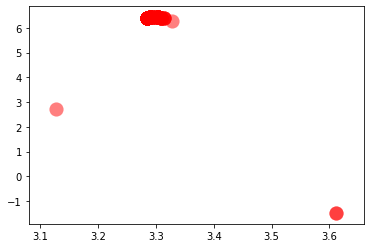

Generation:  194
Max F_values:  641.541667053016


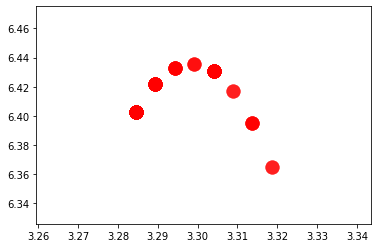

Generation:  195
Max F_values:  641.7414796935715


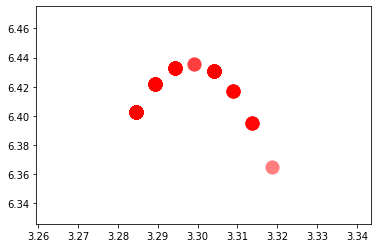

Generation:  196
Max F_values:  626.3224657901184


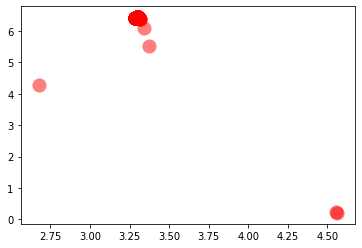

Generation:  197
Max F_values:  639.7975367557808


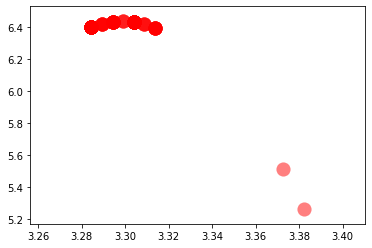

Generation:  198
Max F_values:  638.5366207217982


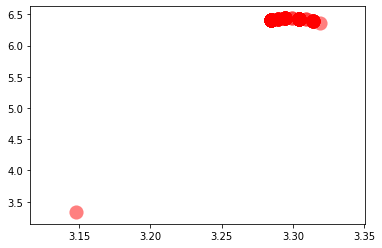

Generation:  199
Max F_values:  632.0583304322354


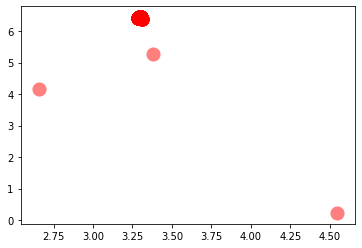

In [177]:
pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE))
GA(N_GENERATIONS,pop)

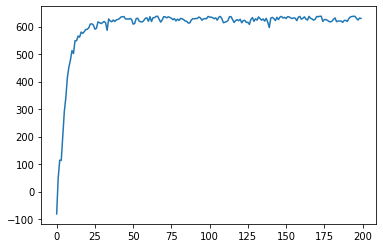

In [137]:
x = np.arange(0, N_GENERATIONS,1)
y = performance
plt.plot(x, y)

In [146]:
x = np.arange(-200, N_GENERATIONS,1)
x.shape

(400,)

In [178]:
def F(x): return -x**2+25     # 目標: 求解100組數據X, 尋找最大值F(X)

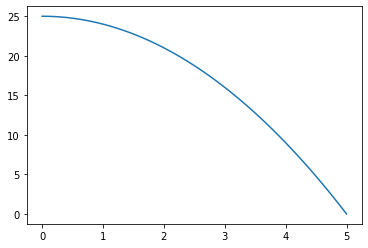

In [158]:
x = np.linspace(0, 5)
plt.plot(x, F(x))

Generation:  0
Max F_values:  1617.0549024441748


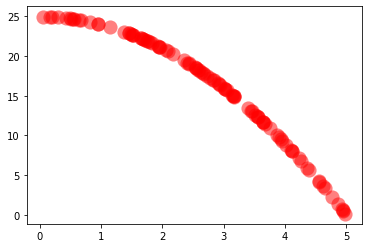

Generation:  1
Max F_values:  1930.4301648592634


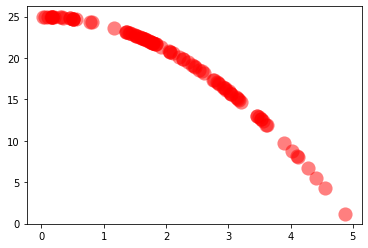

Generation:  2
Max F_values:  1956.4618371779472


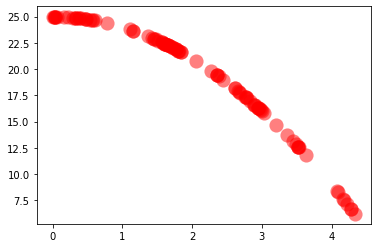

Generation:  3
Max F_values:  2149.5173569007643


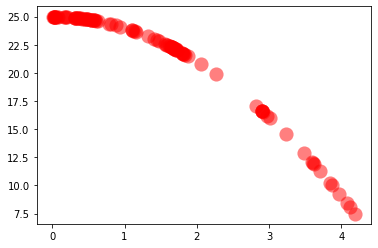

Generation:  4
Max F_values:  2264.963345497354


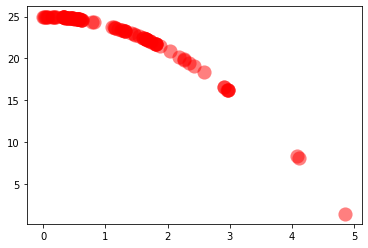

Generation:  5
Max F_values:  2320.2733273516546


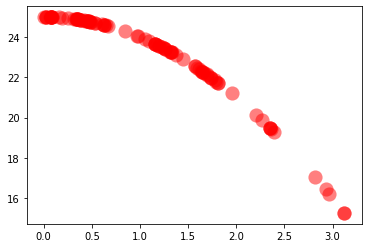

Generation:  6
Max F_values:  2388.706691357813


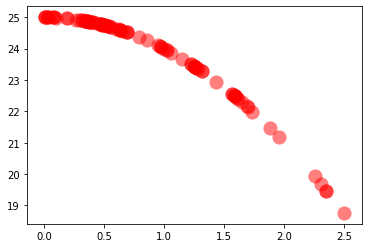

Generation:  7
Max F_values:  2436.4155460574907


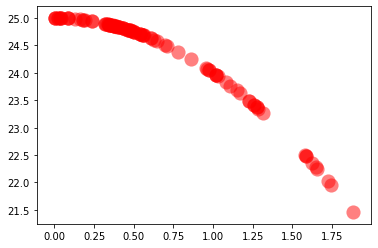

Generation:  8
Max F_values:  2447.7979587761065


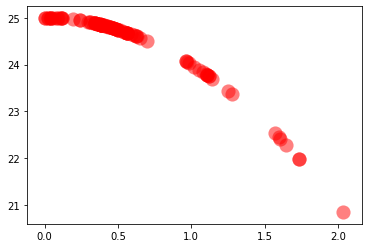

Generation:  9
Max F_values:  2467.0425520936355


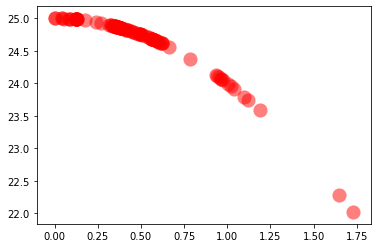

Generation:  10
Max F_values:  2475.9886491439793


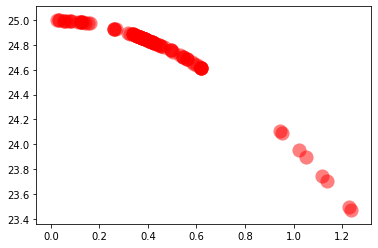

Generation:  11
Max F_values:  2480.150024509592


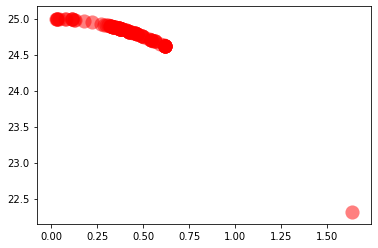

Generation:  12
Max F_values:  2481.3647782335697


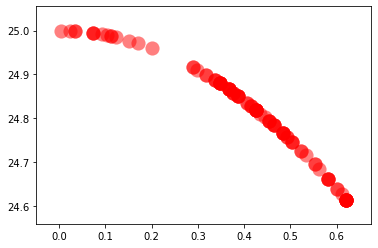

Generation:  13
Max F_values:  2490.0784641419395


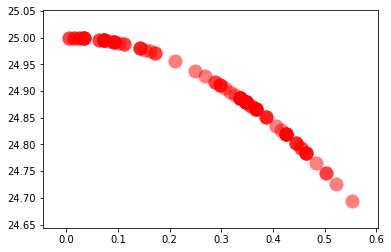

Generation:  14
Max F_values:  2493.129693491532


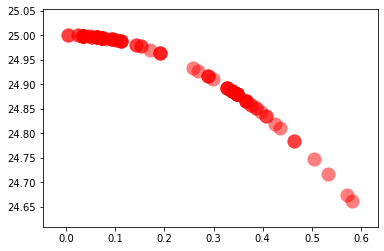

Generation:  15
Max F_values:  2495.1568470630054


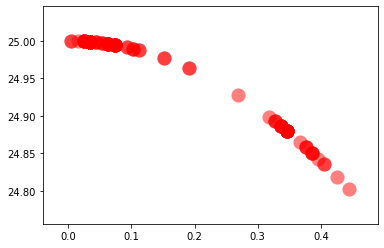

Generation:  16
Max F_values:  2497.183355645185


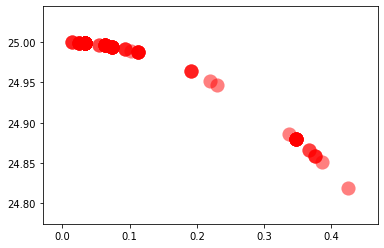

Generation:  17
Max F_values:  2497.34522406928


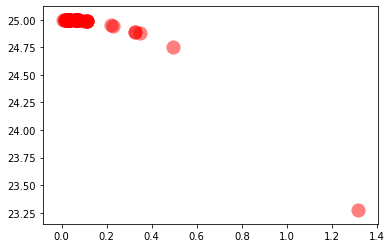

Generation:  18
Max F_values:  2492.87372829611


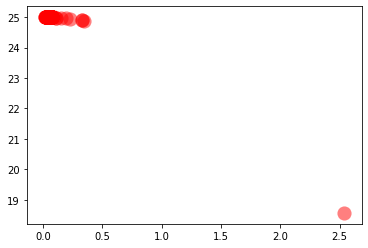

Generation:  19
Max F_values:  2496.0511366622422


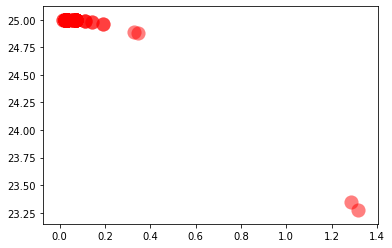

Generation:  20
Max F_values:  2499.482169151548


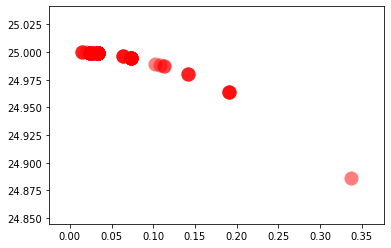

Generation:  21
Max F_values:  2499.44972857895


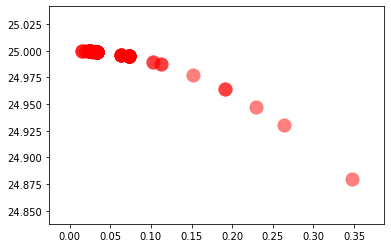

Generation:  22
Max F_values:  2498.9290788884014


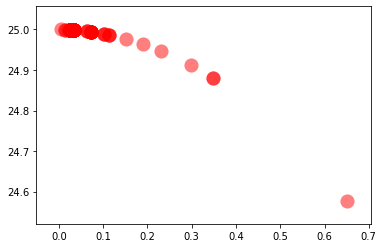

Generation:  23
Max F_values:  2498.5955238698593


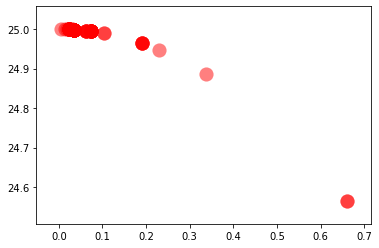

Generation:  24
Max F_values:  2499.414230279333


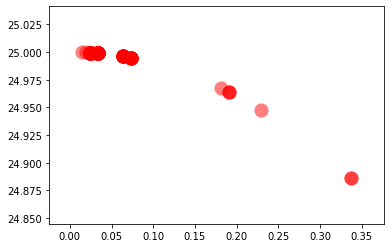

Generation:  25
Max F_values:  2499.827548973798


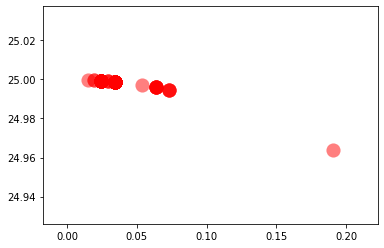

Generation:  26
Max F_values:  2491.73021005629


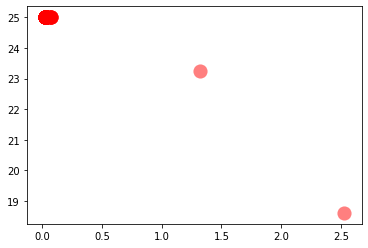

Generation:  27
Max F_values:  2486.5703434878537


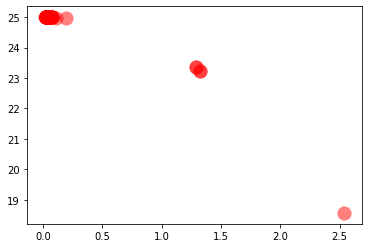

Generation:  28
Max F_values:  2496.377692352529


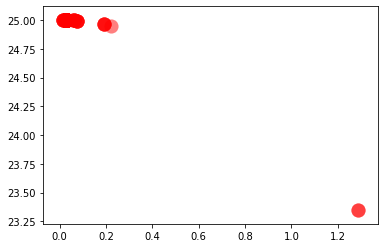

Generation:  29
Max F_values:  2491.5402965421886


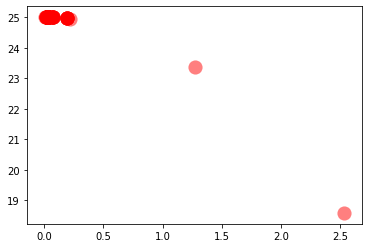

Generation:  30
Max F_values:  2499.0801019369746


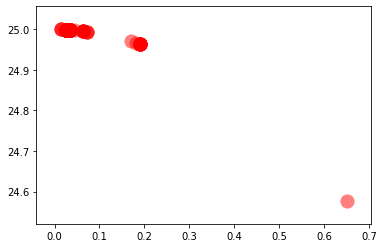

Generation:  31
Max F_values:  2490.902593239174


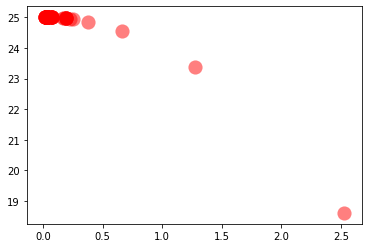

Generation:  32
Max F_values:  2497.2253993917034


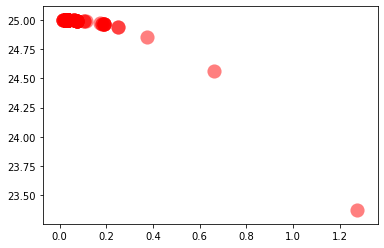

Generation:  33
Max F_values:  2499.098185525675


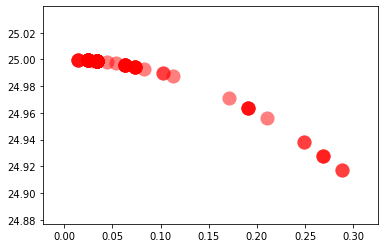

Generation:  34
Max F_values:  2499.5639633493197


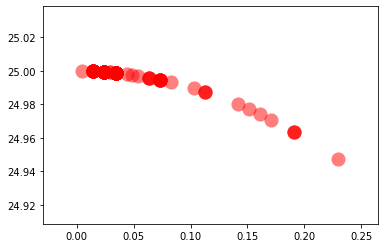

Generation:  35
Max F_values:  2499.507060960565


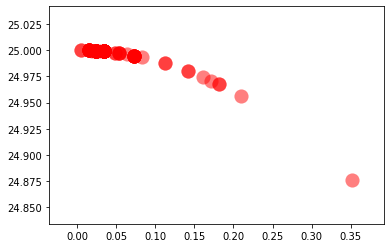

Generation:  36
Max F_values:  2497.556470007042


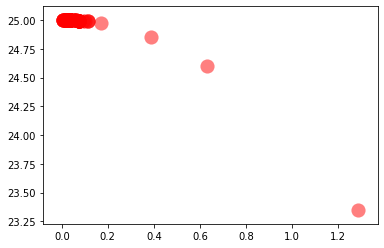

Generation:  37
Max F_values:  2496.134125284631


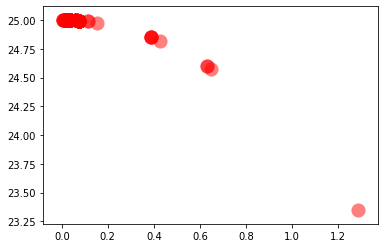

Generation:  38
Max F_values:  2498.217679586519


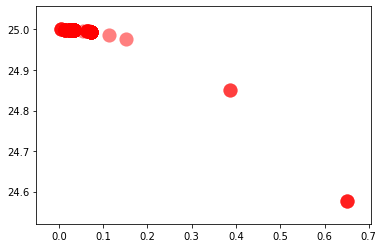

Generation:  39
Max F_values:  2499.6140814062483


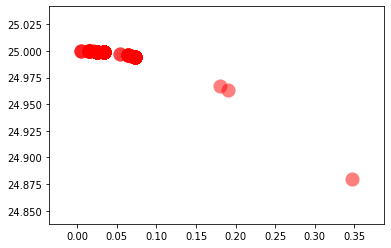

Generation:  40
Max F_values:  2499.3515707639253


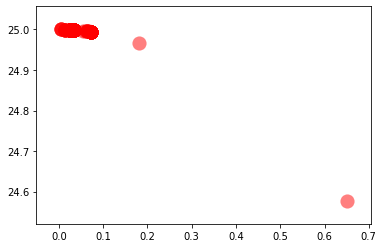

Generation:  41
Max F_values:  2493.443516615402


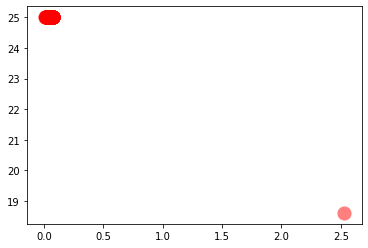

Generation:  42
Max F_values:  2498.2244161413587


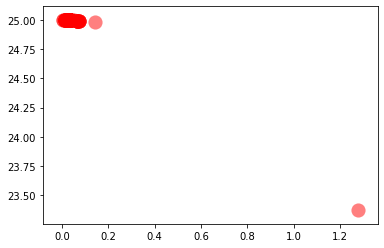

Generation:  43
Max F_values:  2486.249449370251


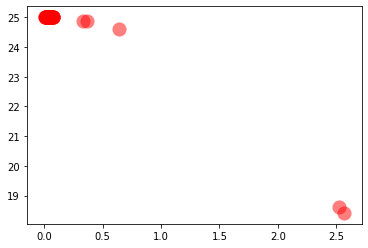

Generation:  44
Max F_values:  2486.424408688149


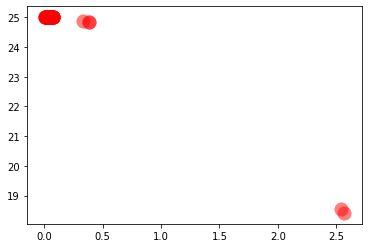

Generation:  45
Max F_values:  2498.0721270026916


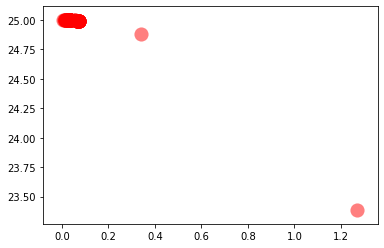

Generation:  46
Max F_values:  2499.445834754699


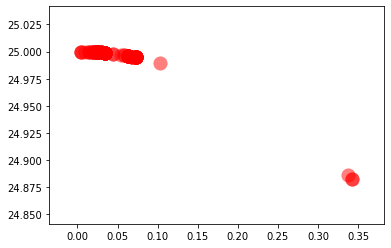

Generation:  47
Max F_values:  2499.7942484154764


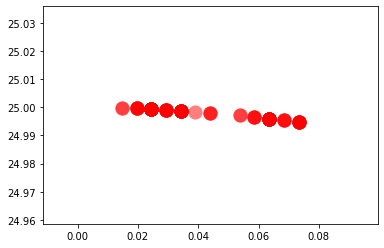

Generation:  48
Max F_values:  2499.8494308327818


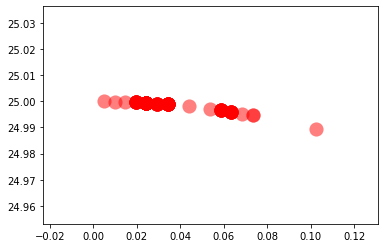

Generation:  49
Max F_values:  2493.054110301769


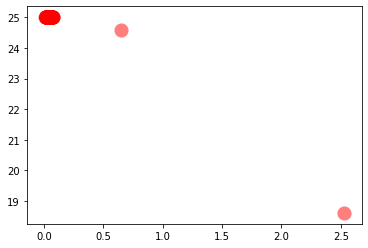

Generation:  50
Max F_values:  2493.4630574021353


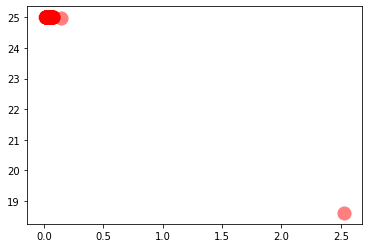

Generation:  51
Max F_values:  2498.1087002844642


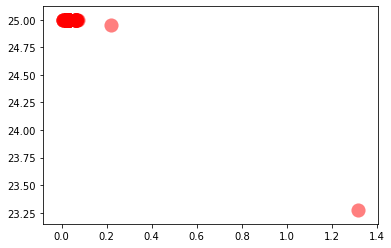

Generation:  52
Max F_values:  2493.4479598749776


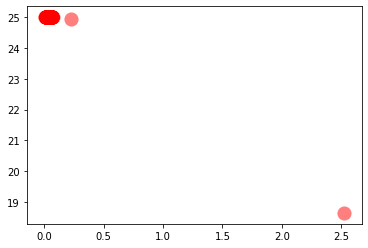

Generation:  53
Max F_values:  2493.239461113835


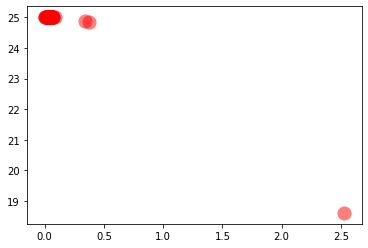

Generation:  54
Max F_values:  2499.7307050258523


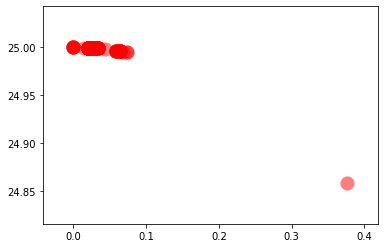

Generation:  55
Max F_values:  2491.833384454707


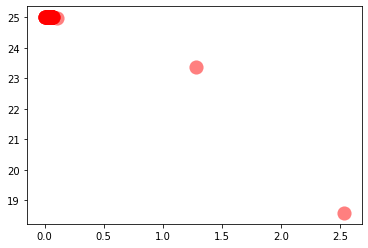

Generation:  56
Max F_values:  2491.166322194607


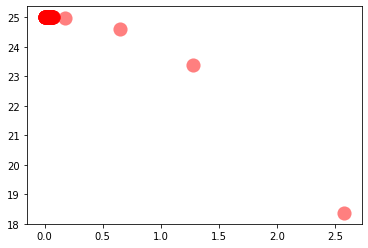

Generation:  57
Max F_values:  2499.758774004352


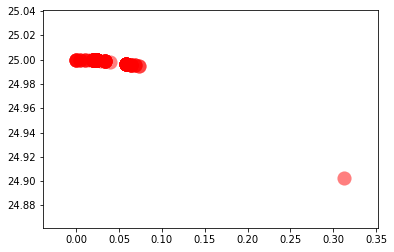

Generation:  58
Max F_values:  2491.8346266563085


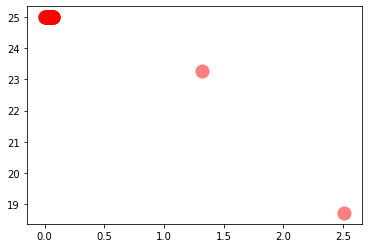

Generation:  59
Max F_values:  2498.107649190801


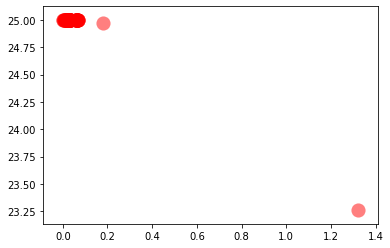

Generation:  60
Max F_values:  2493.206327774959


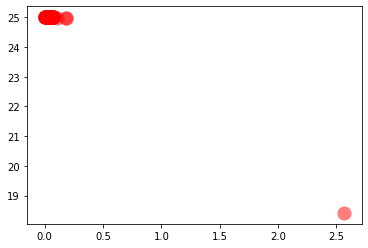

Generation:  61
Max F_values:  2499.768520509226


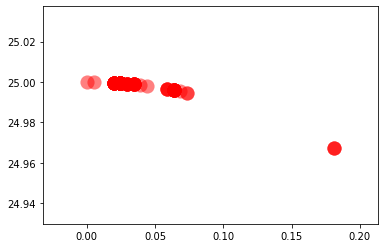

Generation:  62
Max F_values:  2497.7825984755323


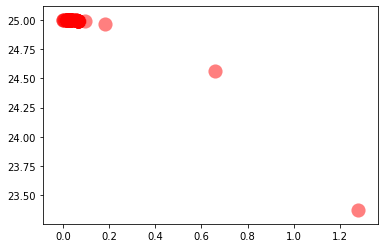

Generation:  63
Max F_values:  2492.295292342592


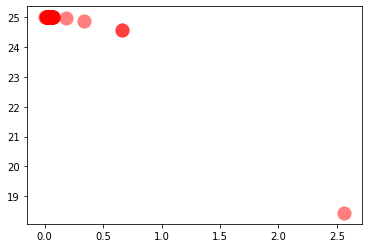

Generation:  64
Max F_values:  2497.0015642184785


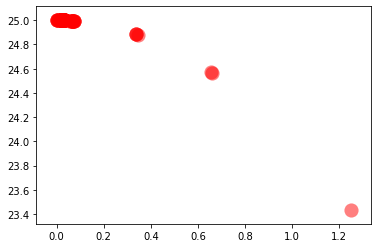

Generation:  65
Max F_values:  2499.0664854963406


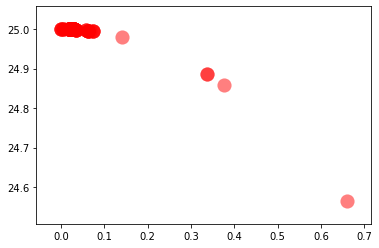

Generation:  66
Max F_values:  2492.9353128293624


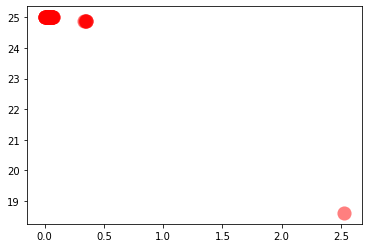

Generation:  67
Max F_values:  2499.32966501645


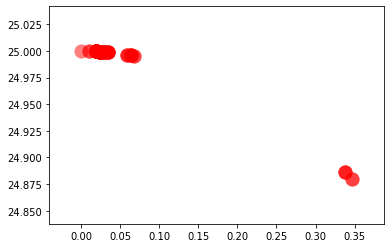

Generation:  68
Max F_values:  2499.4624133683824


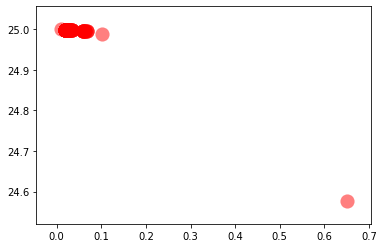

Generation:  69
Max F_values:  2493.047493189391


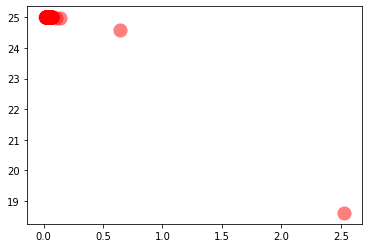

Generation:  70
Max F_values:  2490.9766236769365


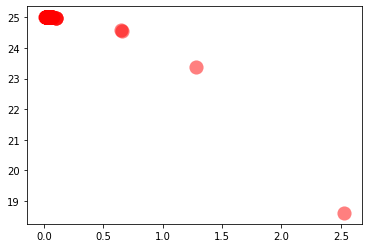

Generation:  71
Max F_values:  2499.820812418958


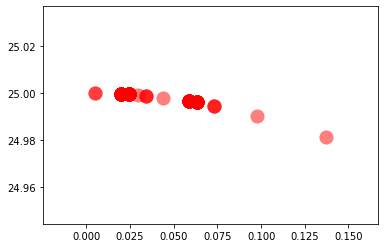

Generation:  72
Max F_values:  2498.1380831300426


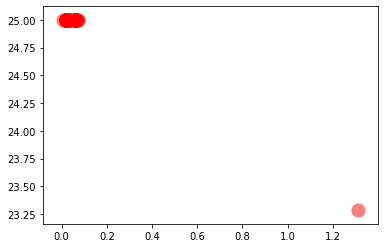

Generation:  73
Max F_values:  2485.583677088738


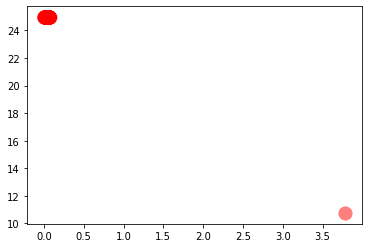

Generation:  74
Max F_values:  2499.4507557841207


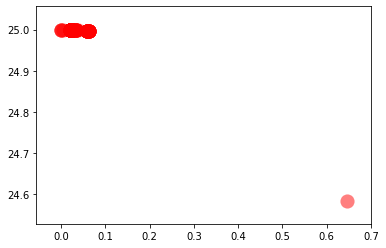

Generation:  75
Max F_values:  2499.853874092357


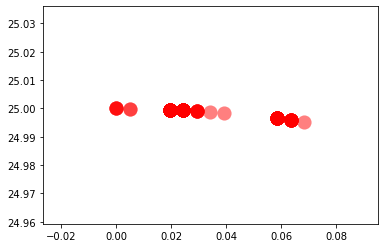

Generation:  76
Max F_values:  2497.8416269401046


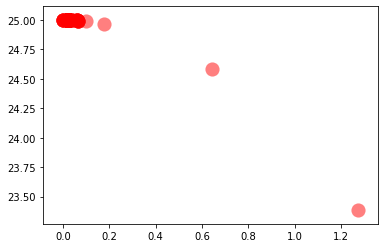

Generation:  77
Max F_values:  2498.1688037311915


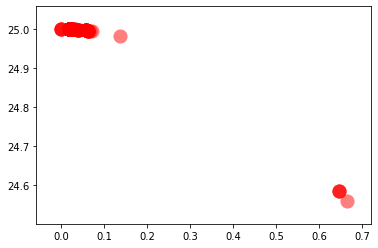

Generation:  78
Max F_values:  2499.7633128178963


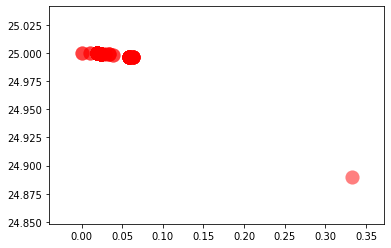

Generation:  79
Max F_values:  2499.869449389362


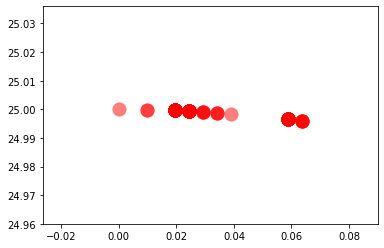

Generation:  80
Max F_values:  2493.55385756152


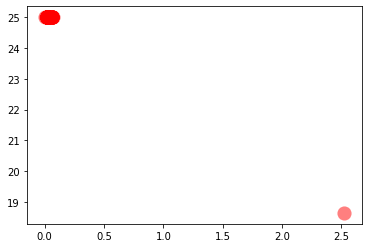

Generation:  81
Max F_values:  2499.483387464657


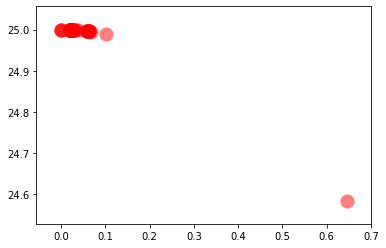

Generation:  82
Max F_values:  2499.8842602546138


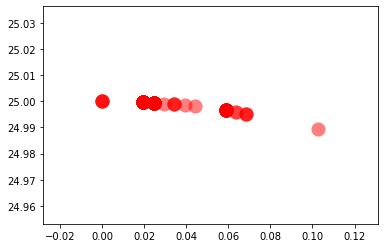

Generation:  83
Max F_values:  2497.745762420344


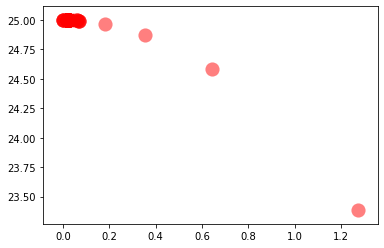

Generation:  84
Max F_values:  2493.074152746843


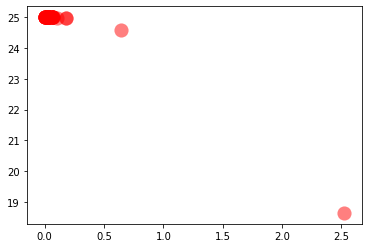

Generation:  85
Max F_values:  2497.0418879935487


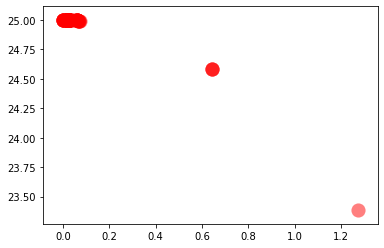

Generation:  86
Max F_values:  2493.527795216378


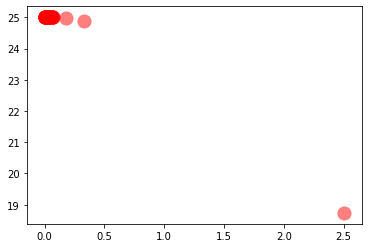

Generation:  87
Max F_values:  2493.438237258595


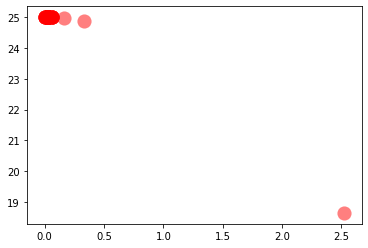

Generation:  88
Max F_values:  2499.789470717009


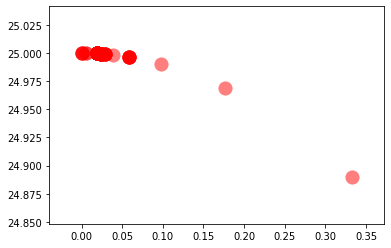

Generation:  89
Max F_values:  2499.8671322056057


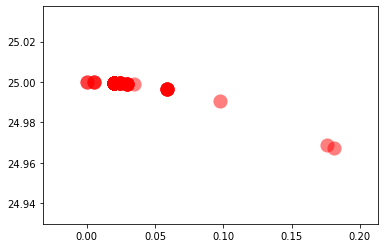

Generation:  90
Max F_values:  2499.9224101768805


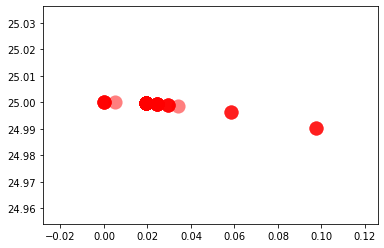

Generation:  91
Max F_values:  2499.9128786684364


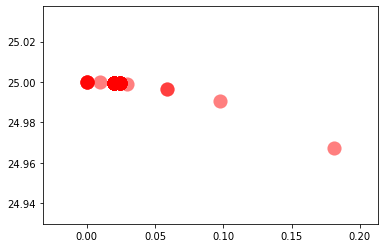

Generation:  92
Max F_values:  2499.53405495691


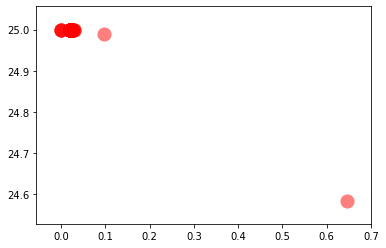

Generation:  93
Max F_values:  2499.816273605414


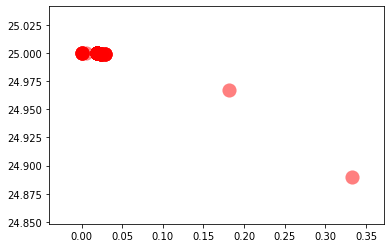

Generation:  94
Max F_values:  2499.8472092029942


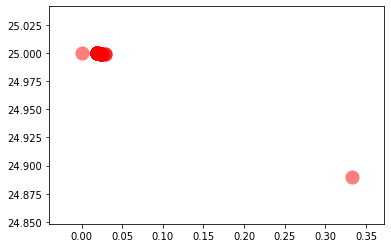

Generation:  95
Max F_values:  2499.946824216052


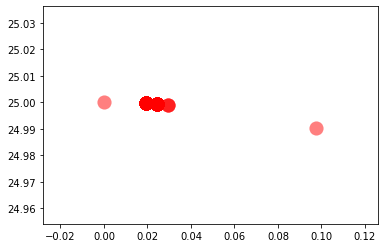

Generation:  96
Max F_values:  2499.9194480038304


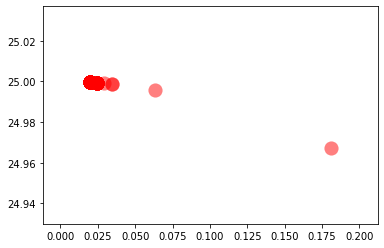

Generation:  97
Max F_values:  2499.919400226846


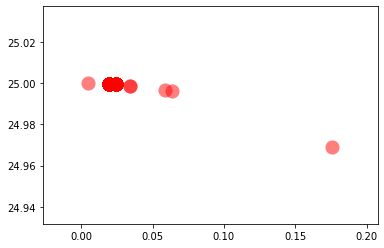

Generation:  98
Max F_values:  2499.725736219446


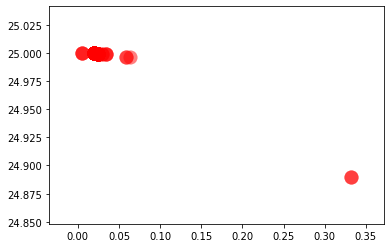

Generation:  99
Max F_values:  2499.523663462742


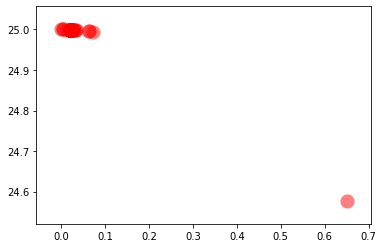

Generation:  100
Max F_values:  2499.9035860449167


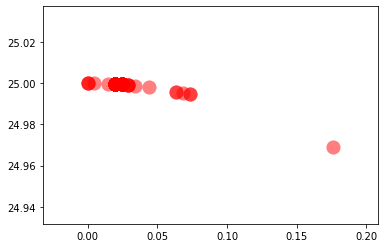

Generation:  101
Max F_values:  2495.055225416592


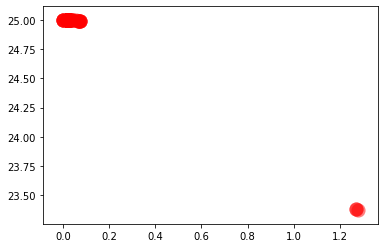

Generation:  102
Max F_values:  2493.3654967994203


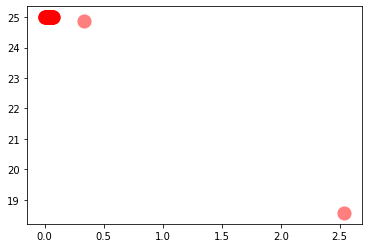

Generation:  103
Max F_values:  2499.52803505684


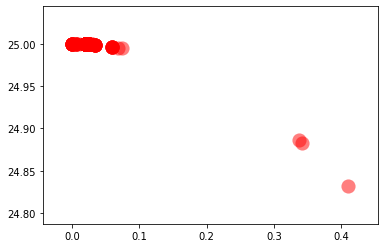

Generation:  104
Max F_values:  2499.8238223689937


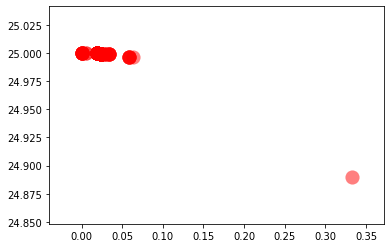

Generation:  105
Max F_values:  2498.2956516255167


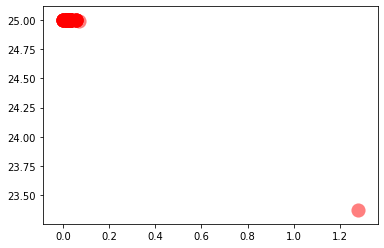

Generation:  106
Max F_values:  2491.8969995098087


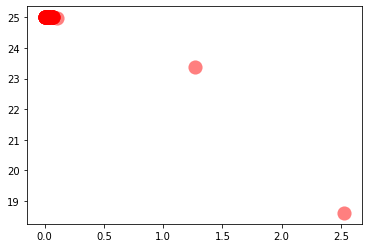

Generation:  107
Max F_values:  2498.2366470494367


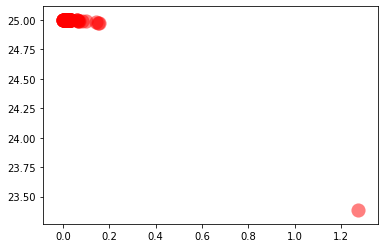

Generation:  108
Max F_values:  2492.683671451054


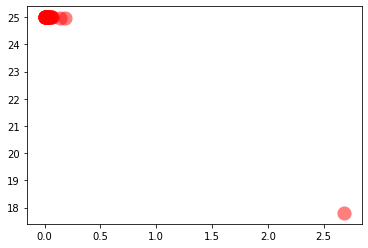

Generation:  109
Max F_values:  2491.404394909267


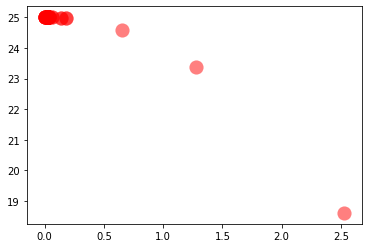

Generation:  110
Max F_values:  2486.1483054936843


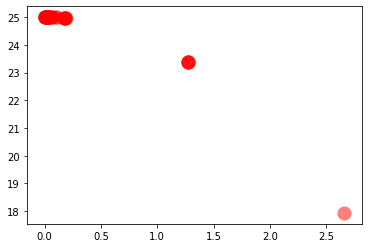

Generation:  111
Max F_values:  2491.511224247011


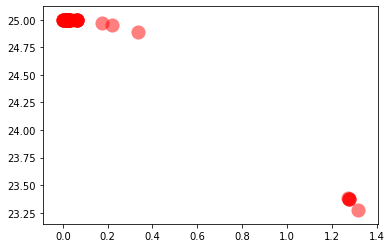

Generation:  112
Max F_values:  2499.837438809627


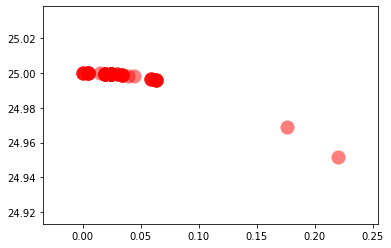

Generation:  113
Max F_values:  2498.249116842438


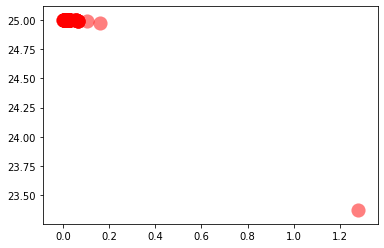

Generation:  114
Max F_values:  2497.6700358996263


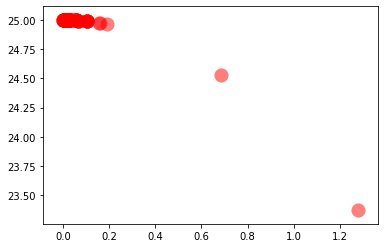

Generation:  115
Max F_values:  2498.2599144409755


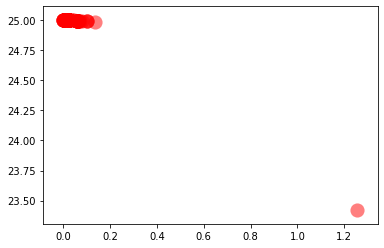

Generation:  116
Max F_values:  2498.076880812667


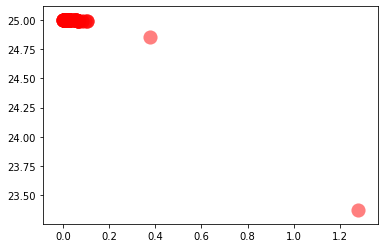

Generation:  117
Max F_values:  2499.420369621864


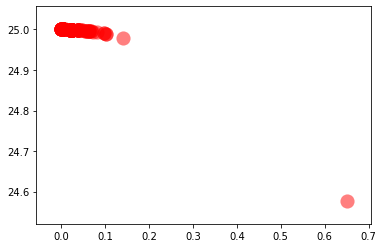

Generation:  118
Max F_values:  2492.978598777482


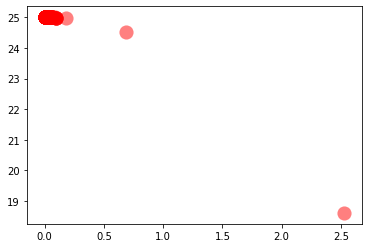

Generation:  119
Max F_values:  2489.4114018818395


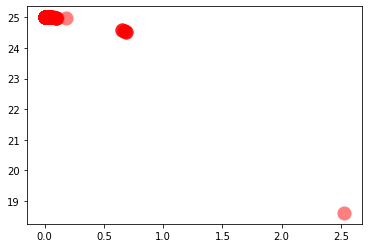

Generation:  120
Max F_values:  2494.6190215464644


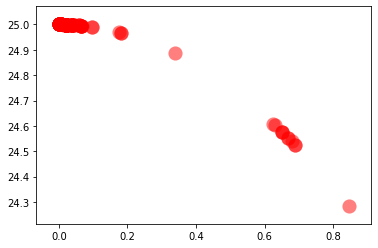

Generation:  121
Max F_values:  2483.7505219635577


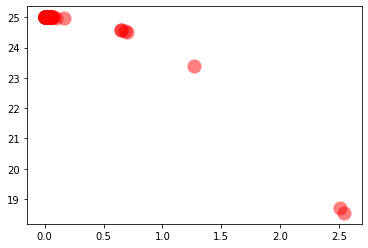

Generation:  122
Max F_values:  2496.255216052303


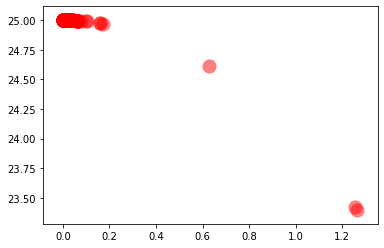

Generation:  123
Max F_values:  2493.551659820225


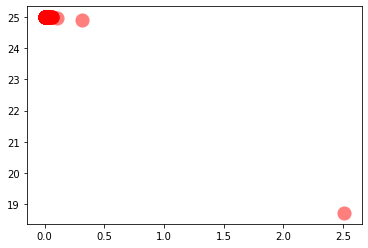

Generation:  124
Max F_values:  2490.241240328744


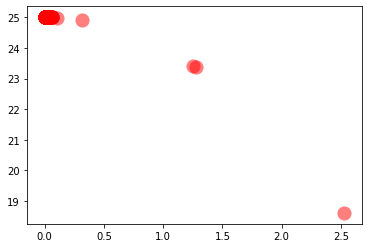

Generation:  125
Max F_values:  2491.789931287141


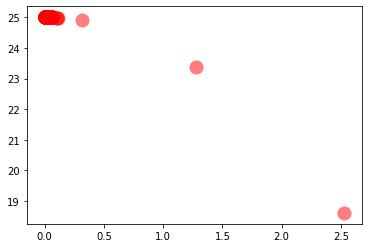

Generation:  126
Max F_values:  2497.7503251223807


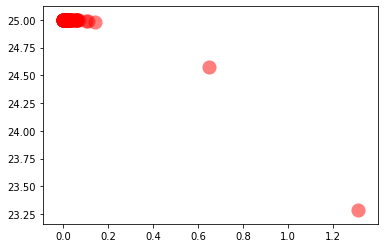

Generation:  127
Max F_values:  2498.8698354273984


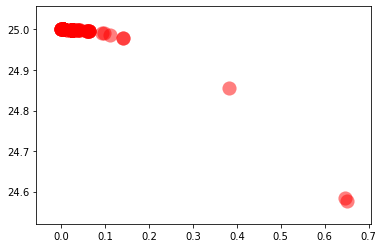

Generation:  128
Max F_values:  2498.043938581731


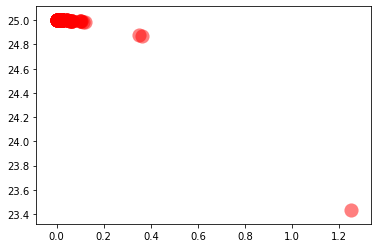

Generation:  129
Max F_values:  2499.272284857849


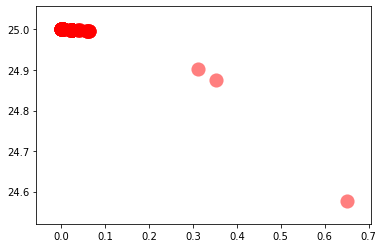

Generation:  130
Max F_values:  2493.4413905395836


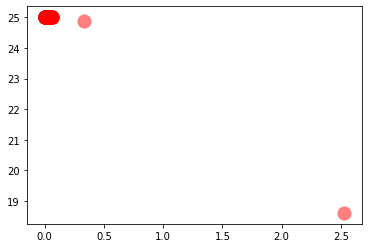

Generation:  131
Max F_values:  2499.944244258879


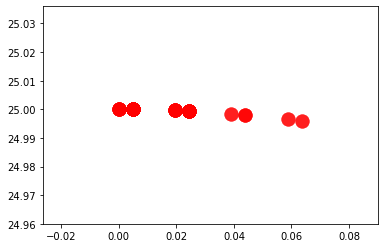

Generation:  132
Max F_values:  2499.97090381633


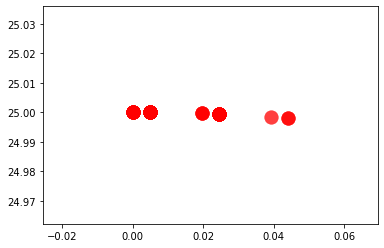

Generation:  133
Max F_values:  2499.868923842531


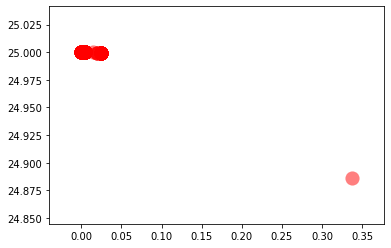

Generation:  134
Max F_values:  2499.9861924514275


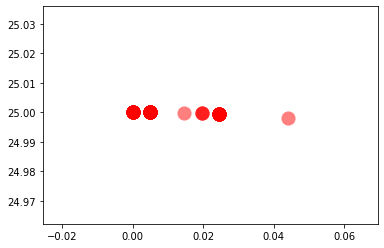

Generation:  135
Max F_values:  2487.415613900809


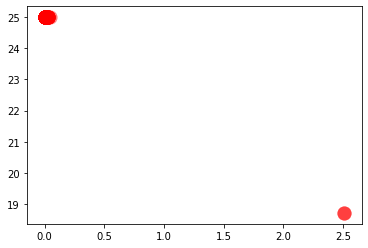

Generation:  136
Max F_values:  2499.957693480066


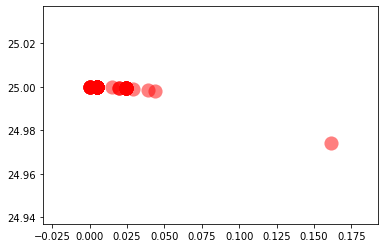

Generation:  137
Max F_values:  2493.6150359904027


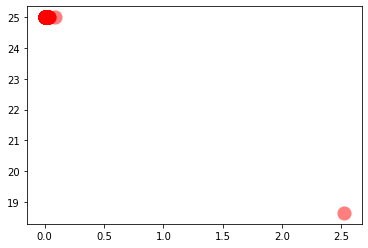

Generation:  138
Max F_values:  2493.547574888035


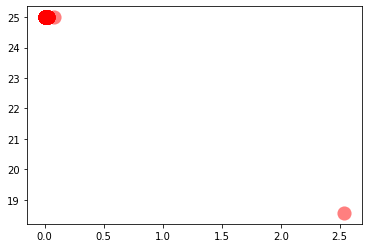

Generation:  139
Max F_values:  2498.007365299958


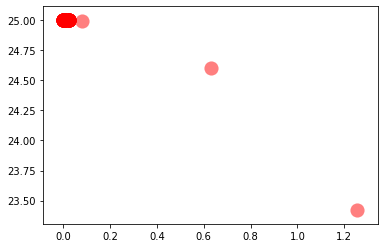

Generation:  140
Max F_values:  2497.6047725385533


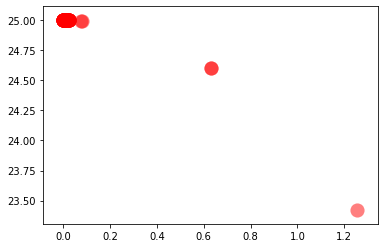

Generation:  141
Max F_values:  2492.0055249305087


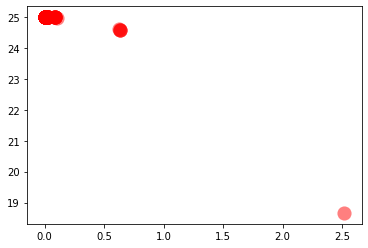

Generation:  142
Max F_values:  2498.146706875777


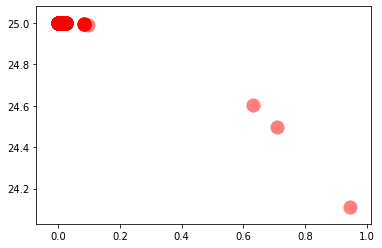

Generation:  143
Max F_values:  2499.1109897575698


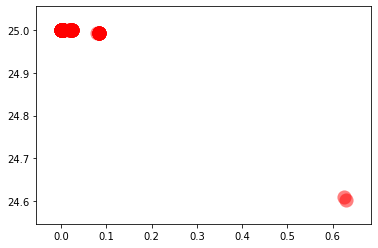

Generation:  144
Max F_values:  2499.3383843161537


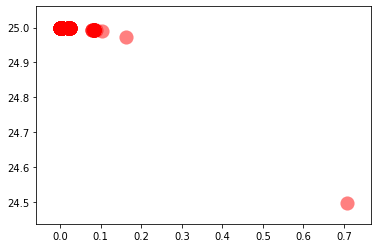

Generation:  145
Max F_values:  2499.450349679751


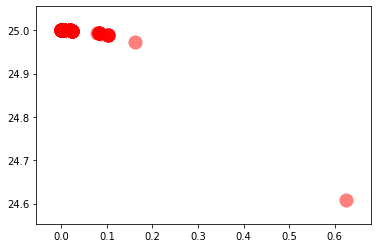

Generation:  146
Max F_values:  2493.5123393618337


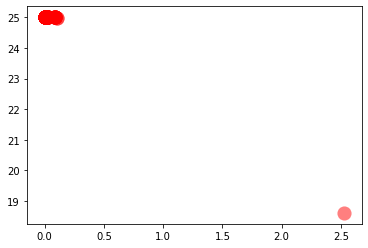

Generation:  147
Max F_values:  2493.421515313957


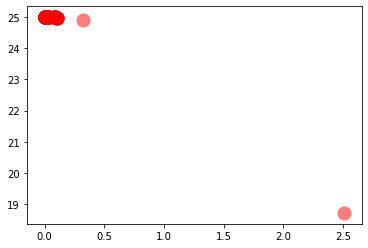

Generation:  148
Max F_values:  2499.4092375844334


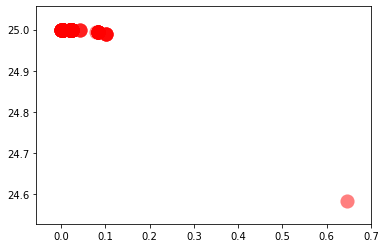

Generation:  149
Max F_values:  2499.824849574164


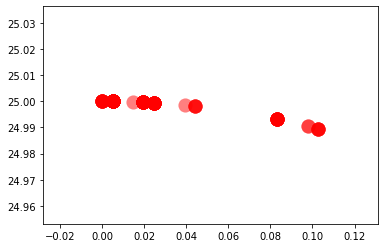

Generation:  150
Max F_values:  2499.409978127697


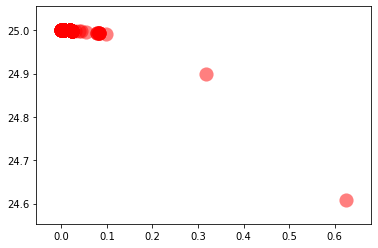

Generation:  151
Max F_values:  2499.9190418994604


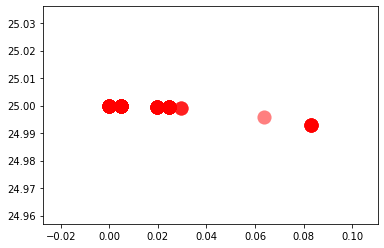

Generation:  152
Max F_values:  2493.612933803077


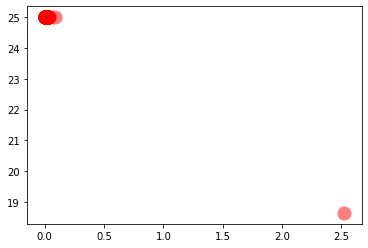

Generation:  153
Max F_values:  2499.5538585170602


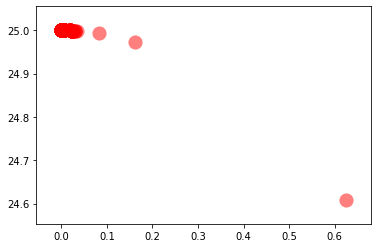

Generation:  154
Max F_values:  2499.9460358958045


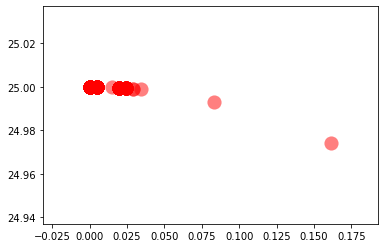

Generation:  155
Max F_values:  2499.8761859442025


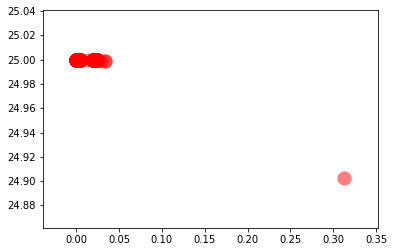

Generation:  156
Max F_values:  2499.860562870212


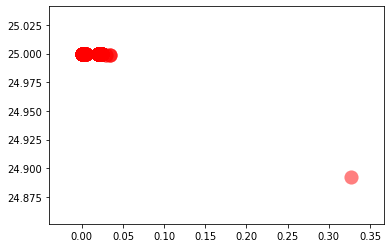

Generation:  157
Max F_values:  2493.169826158664


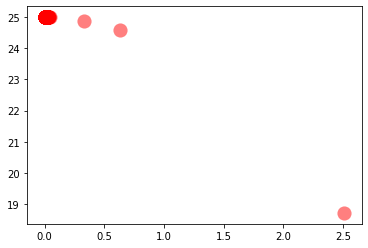

Generation:  158
Max F_values:  2491.9175436132205


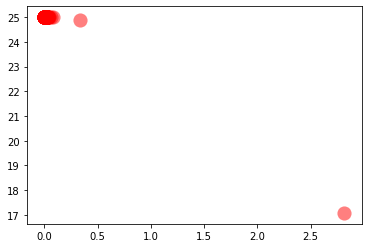

Generation:  159
Max F_values:  2499.932682228586


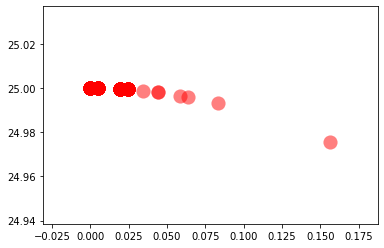

Generation:  160
Max F_values:  2499.864838910341


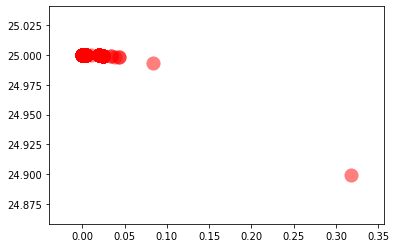

Generation:  161
Max F_values:  2493.571941150221


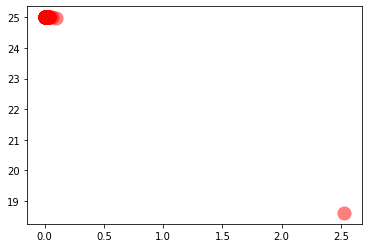

Generation:  162
Max F_values:  2496.348763388306


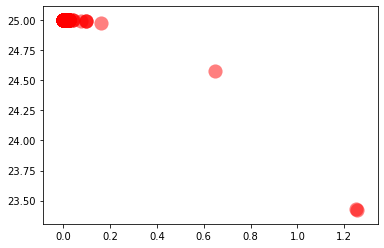

Generation:  163
Max F_values:  2499.5061770863495


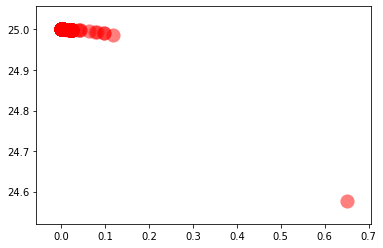

Generation:  164
Max F_values:  2498.255638400847


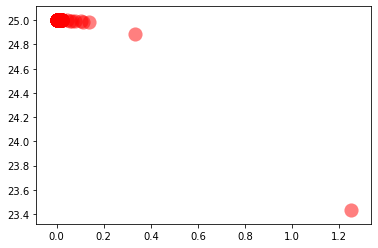

Generation:  165
Max F_values:  2486.893435346751


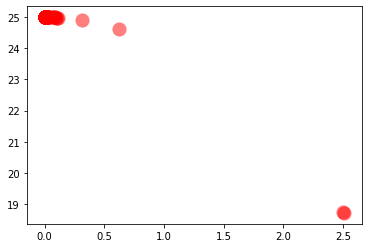

Generation:  166
Max F_values:  2498.2493318388697


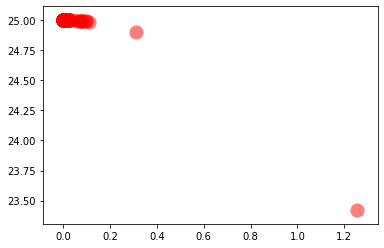

Generation:  167
Max F_values:  2499.604048239466


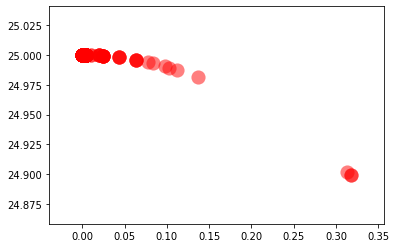

Generation:  168
Max F_values:  2493.525764694529


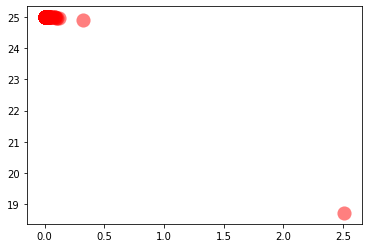

Generation:  169
Max F_values:  2499.292996180708


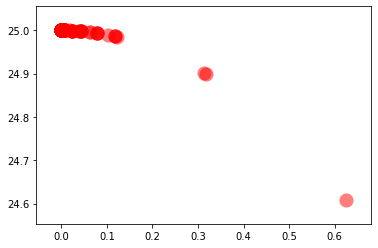

Generation:  170
Max F_values:  2499.8467314331474


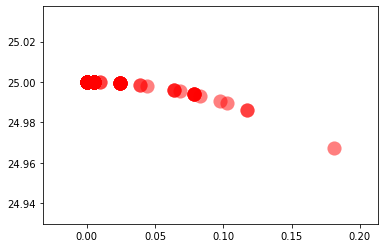

Generation:  171
Max F_values:  2499.5281306108095


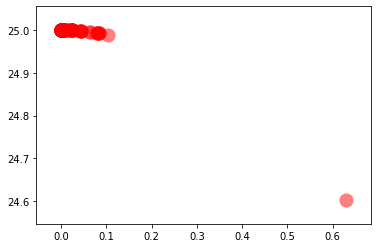

Generation:  172
Max F_values:  2499.5196740845217


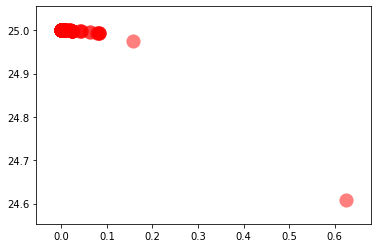

Generation:  173
Max F_values:  2499.726309543262


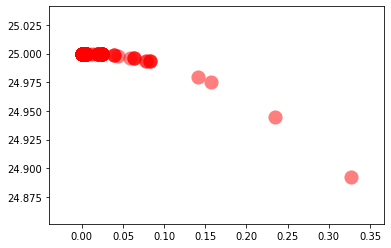

Generation:  174
Max F_values:  2498.2417352983052


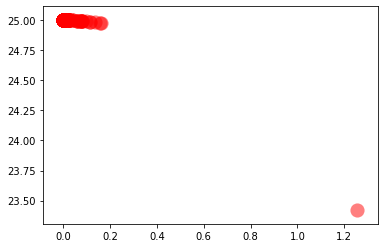

Generation:  175
Max F_values:  2499.801295520717


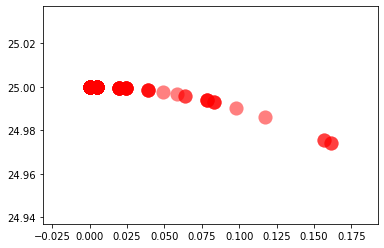

Generation:  176
Max F_values:  2498.2578600306347


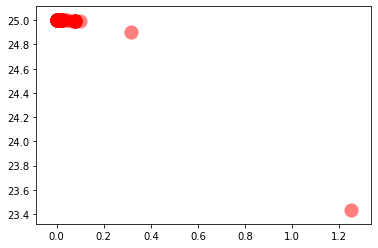

Generation:  177
Max F_values:  2499.9100120493554


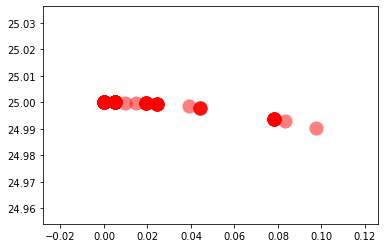

Generation:  178
Max F_values:  2499.8486425125343


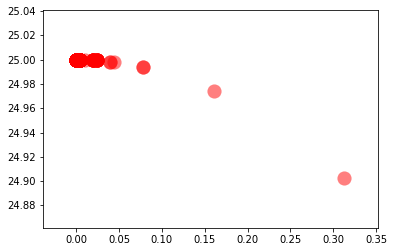

Generation:  179
Max F_values:  2493.674613890298


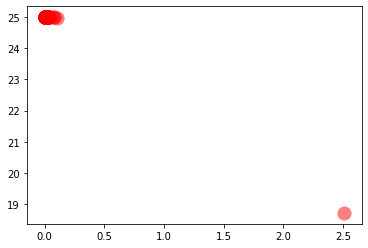

Generation:  180
Max F_values:  2493.2736455463732


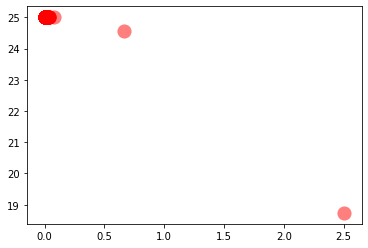

Generation:  181
Max F_values:  2499.9798620009574


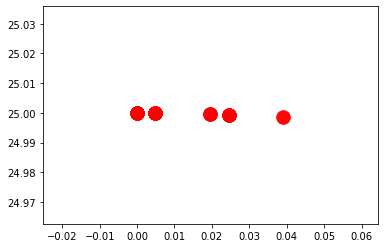

Generation:  182
Max F_values:  2499.8813219700555


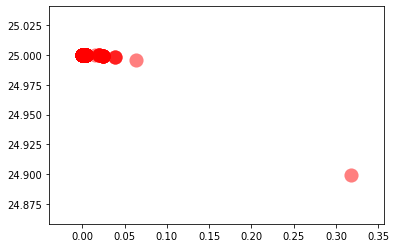

Generation:  183
Max F_values:  2499.926065116208


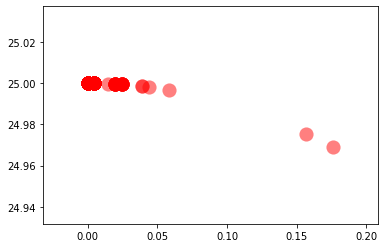

Generation:  184
Max F_values:  2493.564010170765


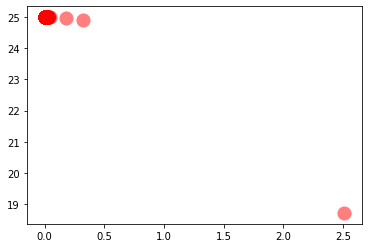

Generation:  185
Max F_values:  2498.3741253228527


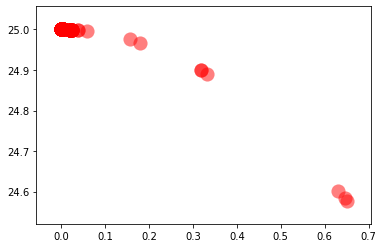

Generation:  186
Max F_values:  2499.43635102324


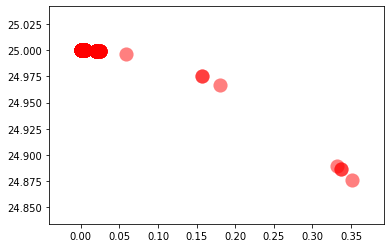

Generation:  187
Max F_values:  2499.9028216131614


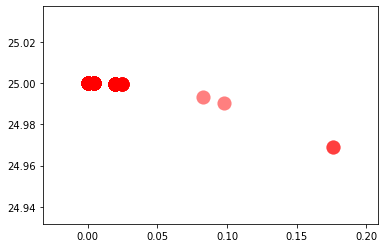

Generation:  188
Max F_values:  2498.34846908208


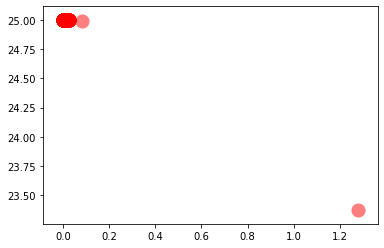

Generation:  189
Max F_values:  2499.5801119701414


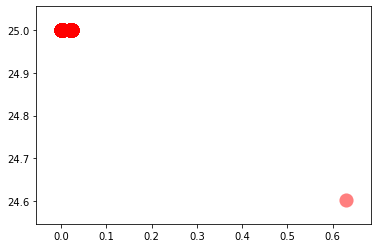

Generation:  190
Max F_values:  2492.0586768259645


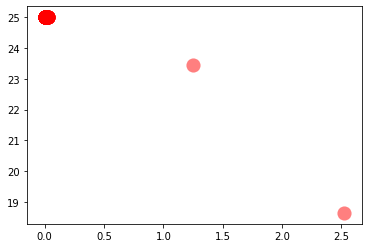

Generation:  191
Max F_values:  2496.7973176089727


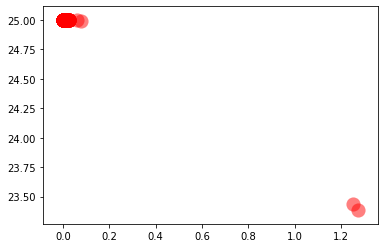

Generation:  192
Max F_values:  2497.998789331208


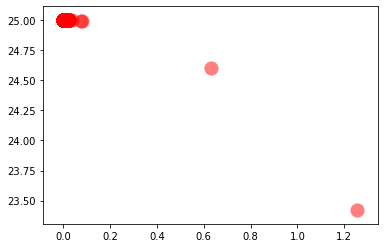

Generation:  193
Max F_values:  2498.2680843053563


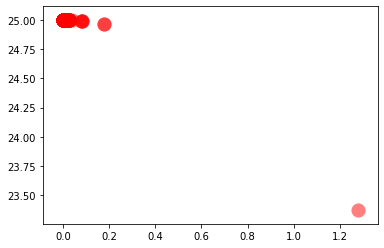

Generation:  194
Max F_values:  2493.5466671253253


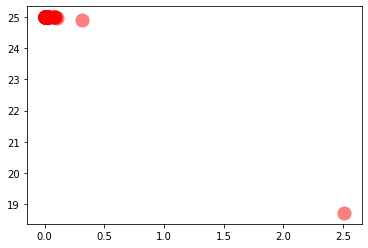

Generation:  195
Max F_values:  2493.3774410455903


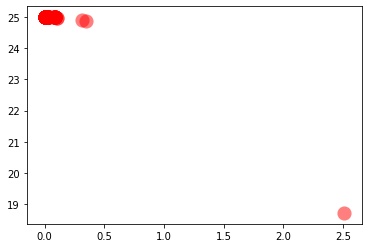

Generation:  196
Max F_values:  2491.8776976079976


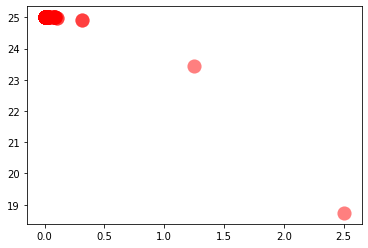

Generation:  197
Max F_values:  2499.574211512533


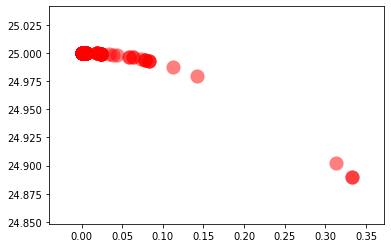

Generation:  198
Max F_values:  2499.911899240251


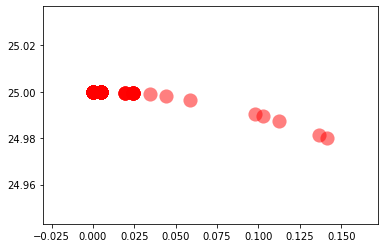

Generation:  199
Max F_values:  2496.6883383069176


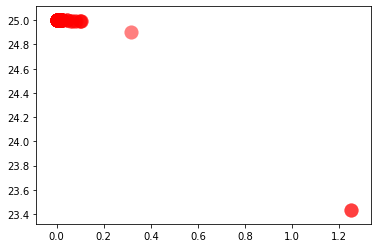

In [179]:
pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE))
GA(N_GENERATIONS,pop)

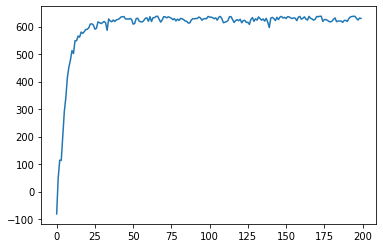

In [160]:
x = np.arange(0, N_GENERATIONS,1)
y = performance
plt.plot(x, y)